In [1]:
import numpy
import pandas
import matplotlib
import sklearn
import scipy
import seaborn
import xgboost
import pickleshare

print("Library Versions:")
print(f"numpy       : {numpy.__version__}")
print(f"pandas      : {pandas.__version__}")
print(f"matplotlib  : {matplotlib.__version__}")
print(f"scikit-learn: {sklearn.__version__}")
print(f"scipy       : {scipy.__version__}")
print(f"seaborn     : {seaborn.__version__}")
print(f"xgboost     : {xgboost.__version__}")
print(f"pickleshare : {pickleshare.__version__}")

Library Versions:
numpy       : 1.26.4
pandas      : 2.2.2
matplotlib  : 3.10.1
scikit-learn: 1.6.1
scipy       : 1.15.2
seaborn     : 0.13.2
xgboost     : 2.1.3
pickleshare : 0.7.5


### **Importing Libraries and Loading the Dataset**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
warnings.simplefilter(action = 'ignore')
pd.set_option('display.max_columns', None)

In [4]:
properties_2016 = pd.read_csv("properties_2016.csv")
train_2016 = pd.read_csv("train_2016_v2.csv")

In [5]:
properties_2016

parcelid  airconditioningtypeid  architecturalstyletypeid  \
0         10754147                    NaN                       NaN   
1         10759547                    NaN                       NaN   
2         10843547                    NaN                       NaN   
3         10859147                    NaN                       NaN   
4         10879947                    NaN                       NaN   
...            ...                    ...                       ...   
2985212  168176230                    NaN                       NaN   
2985213   14273630                    NaN                       NaN   
2985214  168040630                    NaN                       NaN   
2985215  168040830                    NaN                       NaN   
2985216  168040430                    NaN                       NaN   

         basementsqft  bathroomcnt  bedroomcnt  buildingclasstypeid  \
0                 NaN          0.0         0.0                  NaN   
1                 NaN          0.0         0.0                  NaN   
2                 NaN          0.0         0.0                  NaN   
3                 NaN          0.0         0.0                  3.0   
4                 NaN          0.0         0.0                  4.0   
...               ...          ...         ...                  ...   
2985212           NaN          NaN         NaN                  NaN   
2985213           NaN          NaN         NaN                  NaN   
2985214           NaN          NaN         NaN                  NaN   
2985215           NaN          NaN         NaN                  NaN   
2985216           NaN          NaN         NaN                  NaN   

         buildingqualitytypeid  calculatedbathnbr  decktypeid  \
0                          NaN                NaN         NaN   
1                          NaN                NaN         NaN   
2                          NaN                NaN         NaN   
3                          7.0                NaN         NaN   
4                          NaN                NaN         NaN   
...                        ...                ...         ...   
2985212                    NaN                NaN         NaN   
2985213                    NaN                NaN         NaN   
2985214                    NaN                NaN         NaN   
2985215                    NaN                NaN         NaN   
2985216                    NaN                NaN         NaN   

         finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
0                             NaN                           NaN   
1                             NaN                           NaN   
2                             NaN                       73026.0   
3                             NaN                        5068.0   
4                             NaN                        1776.0   
...                           ...                           ...   
2985212                       NaN                           NaN   
2985213                       NaN                           NaN   
2985214                       NaN                           NaN   
2985215                       NaN                           NaN   
2985216                       NaN                           NaN   

         finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
0                         NaN                   NaN                   NaN   
1                         NaN                   NaN                   NaN   
2                         NaN                   NaN               73026.0   
3                         NaN                   NaN                5068.0   
4                         NaN                   NaN                1776.0   
...                       ...                   ...                   ...   
2985212                   NaN                   NaN                   NaN   
2985213                   NaN                   NaN                   NaN   
2985214                  

In [6]:
train_2016

parcelid  logerror transactiondate
0      11016594    0.0276      2016-01-01
1      14366692   -0.1684      2016-01-01
2      12098116   -0.0040      2016-01-01
3      12643413    0.0218      2016-01-02
4      14432541   -0.0050      2016-01-02
...         ...       ...             ...
90270  10774160   -0.0356      2016-12-30
90271  12046695    0.0070      2016-12-30
90272  12995401   -0.2679      2016-12-30
90273  11402105    0.0602      2016-12-30
90274  12566293    0.4207      2016-12-30

[90275 rows x 3 columns]

### **Shape of the Datasets**

In [8]:
print('Shape of properties_2016: ', properties_2016.shape)
print('Shape of train_2016: ', train_2016.shape)

Shape of properties_2016:  (2985217, 58)
Shape of train_2016:  (90275, 3)


In [11]:
properties_2016.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  10754147                    NaN                       NaN           NaN   
1  10759547                    NaN                       NaN           NaN   
2  10843547                    NaN                       NaN           NaN   
3  10859147                    NaN                       NaN           NaN   
4  10879947                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          0.0         0.0                  NaN                    NaN   
1          0.0         0.0                  NaN                    NaN   
2          0.0         0.0                  NaN                    NaN   
3          0.0         0.0                  3.0                    7.0   
4          0.0         0.0                  4.0                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                NaN         NaN                       NaN   
1                NaN         NaN                       NaN   
2                NaN         NaN                       NaN   
3                NaN         NaN                       NaN   
4                NaN         NaN                       NaN   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                           NaN                   NaN                   NaN   
1                           NaN                   NaN                   NaN   
2                       73026.0                   NaN                   NaN   
3                        5068.0                   NaN                   NaN   
4                        1776.0                   NaN                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6    fips  \
0                   NaN                   NaN                  NaN  6037.0   
1                   NaN                   NaN                  NaN  6037.0   
2               73026.0                   NaN                  NaN  6037.0   
3                5068.0                   NaN                  NaN  6037.0   
4                1776.0                   NaN                  NaN  6037.0   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0           NaN          NaN           NaN              NaN            NaN   
1           NaN          NaN           NaN              NaN            NaN   
2           NaN          NaN           NaN              NaN            NaN   
3           NaN          NaN           NaN              NaN            NaN   
4           NaN          NaN           NaN              NaN            NaN   

   heatingorsystemtypeid    latitude    longitude  lotsizesquarefeet  poolcnt  \
0                    NaN  34144442.0 -118654084.0            85768.0      NaN   
1                    NaN  34140430.0 -118625364.0             4083.0      NaN   
2                    NaN  33989359.0 -118394633.0            63085.0      NaN   
3                    NaN  34148863.0 -118437206.0             7521.0      NaN   
4                    NaN  34194168.0 -118385816.0             8512.0      NaN   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0          NaN           NaN          NaN          NaN   
1          NaN           NaN          NaN          NaN   
2          NaN           NaN          NaN          NaN   
3          NaN           NaN          NaN          NaN   
4          NaN           NaN          NaN          NaN   

  propertycountylandusecode  propertylandusetypeid propertyzoningdesc  \
0                      010D                  269.0                NaN   
1                      0109                  261.0             LCA11*   
2                      1200                   47.0               LAC2   
3                      1200                   47.0               LAC2   
4                      1210                   31.0               LAM1   

   rawcensustractandblock  r

In [12]:
train_2016.head()

parcelid  logerror transactiondate
0  11016594    0.0276      2016-01-01
1  14366692   -0.1684      2016-01-01
2  12098116   -0.0040      2016-01-01
3  12643413    0.0218      2016-01-02
4  14432541   -0.0050      2016-01-02

### **Feature Description**

In [14]:
# Load the Excel file
file_path = "zillow_data_dictionary.xlsx"
excel_file = pd.ExcelFile(file_path)

# Load the 'Data Dictionary' sheet
data_dictionary = excel_file.parse("Data Dictionary")

# Display the first few rows
data_dictionary

Feature  \
0          'airconditioningtypeid'   
1       'architecturalstyletypeid'   
2                   'basementsqft'   
3                    'bathroomcnt'   
4                     'bedroomcnt'   
5          'buildingqualitytypeid'   
6            'buildingclasstypeid'   
7              'calculatedbathnbr'   
8                     'decktypeid'   
9            'threequarterbathnbr'   
10      'finishedfloor1squarefeet'   
11  'calculatedfinishedsquarefeet'   
12           'finishedsquarefeet6'   
13          'finishedsquarefeet12'   
14          'finishedsquarefeet13'   
15          'finishedsquarefeet15'   
16          'finishedsquarefeet50'   
17                          'fips'   
18                  'fireplacecnt'   
19                 'fireplaceflag'   
20                   'fullbathcnt'   
21                  'garagecarcnt'   
22               'garagetotalsqft'   
23                'hashottuborspa'   
24         'heatingorsystemtypeid'   
25                      'latitude'   
26                     'longitude'   
27             'lotsizesquarefeet'   
28               'numberofstories'   
29                      'parcelid'   
30                       'poolcnt'   
31                   'poolsizesum'   
32                  'pooltypeid10'   
33                   'pooltypeid2'   
34                   'pooltypeid7'   
35     'propertycountylandusecode'   
36         'propertylandusetypeid'   
37            'propertyzoningdesc'   
38        'rawcensustractandblock'   
39           'censustractandblock'   
40                'regionidcounty'   
41                  'regionidcity'   
42                   'regionidzip'   
43          'regionidneighborhood'   
44                       'roomcnt'   
45                   'storytypeid'   
46        'typeconstructiontypeid'   
47                       'unitcnt'   
48            'yardbuildingsqft17'   
49            'yardbuildingsqft26'   
50                     'yearbuilt'   
51             'taxvaluedollarcnt'   
52    'structuretaxvaluedollarcnt'   
53         'landtaxvaluedollarcnt'   
54                     'taxamount'   
55                'assessmentyear'   
56            'taxdelinquencyflag'   
57            'taxdelinquencyyear'   

                                          Description  
0    Type of cooling system present in the home (i...  
1    Architectural style of the home (i.e. ranch, ...  
2    Finished living area below or partially below...  
3    Number of bathrooms in home including fractio...  
4                         Number of bedrooms in home   
5    Overall assessment of condition of the buildi...  
6   The building framing type (steel frame, wood f...  
7    Number of bathrooms in home including fractio...  
8             Type of deck (if any) present on parcel  
9    Number of 3/4 bathrooms in house (shower + si...  
10   Size of the finished living area on the first...  
11   Calculated total finished living area of the ...  
12                  Base unfinished and finished area  
13                               Finished living area  
14                             Perimeter  living area  
15                                         Total area  
16   Size of the finished living area on the first...  
17   Federal Information Processing Standard code ...  
18            Number of fireplaces in a home (if any)  
19               Is a fireplace present in this home   
20   Number of full bathrooms (sink, shower + bath...  
21   Total number of garages on the lot including ...  
22   Total number of square feet of all garages on...  
23                Does the home have a hot tub or spa  
24                        Type of home heating system  
25   Latitude of the middle of the parcel multipli...  
26   Longitude of the middle of the parcel multipl...  
27                     Area of the lot in square feet  
28           Number of stories or levels the home has  
29              Unique identifier for parcels (lots)   
30                Number of pools on the lot (if

### **Reforming the Dataset**

In [16]:
final_df = properties_2016.copy()
final_df = final_df.merge(train_2016, how = 'inner', on = 'parcelid')
final_df.head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17073783                    NaN                       NaN           NaN   
1  17088994                    NaN                       NaN           NaN   
2  17100444                    NaN                       NaN           NaN   
3  17102429                    NaN                       NaN           NaN   
4  17109604                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          2.5         3.0                  NaN                    NaN   
1          1.0         2.0                  NaN                    NaN   
2          2.0         3.0                  NaN                    NaN   
3          1.5         2.0                  NaN                    NaN   
4          2.5         4.0                  NaN                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                2.5         NaN                     548.0   
1                1.0         NaN                     777.0   
2                2.0         NaN                    1101.0   
3                1.5         NaN                    1554.0   
4                2.5         NaN                    1305.0   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                        1264.0                1264.0                   NaN   
1                         777.0                 777.0                   NaN   
2                        1101.0                1101.0                   NaN   
3                        1554.0                1554.0                   NaN   
4                        2415.0                2415.0                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6    fips  \
0                   NaN                 548.0                  NaN  6111.0   
1                   NaN                 777.0                  NaN  6111.0   
2                   NaN                1101.0                  NaN  6111.0   
3                   NaN                1554.0                  NaN  6111.0   
4                   NaN                1305.0                  NaN  6111.0   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft hashottuborspa  \
0           NaN          2.0           2.0              0.0            NaN   
1           NaN          1.0           1.0              0.0            NaN   
2           NaN          2.0           2.0            441.0            NaN   
3           1.0          1.0           2.0            460.0            NaN   
4           1.0          2.0           2.0            665.0            NaN   

   heatingorsystemtypeid    latitude    longitude  lotsizesquarefeet  poolcnt  \
0                    NaN  34303597.0 -119287236.0             1735.0      NaN   
1                    NaN  34272866.0 -119198911.0                NaN      NaN   
2                    NaN  34340801.0 -119079610.0             6569.0      NaN   
3                    NaN  34354313.0 -119076405.0             7400.0      NaN   
4                    NaN  34266578.0 -119165392.0             6326.0      NaN   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  \
0          NaN           NaN          NaN          NaN   
1          NaN           NaN          NaN          NaN   
2          NaN           NaN          NaN          NaN   
3          NaN           NaN          NaN          NaN   
4          NaN           NaN          NaN          NaN   

  propertycountylandusecode  propertylandusetypeid propertyzoningdesc  \
0                      1128                  265.0                NaN   
1                      1129                  266.0                NaN   
2                      1111                  261.0                NaN   
3                      1110                  261.0                NaN   
4                      1111                  261.0                NaN   

   rawcensustractandblock  r

In [17]:
final_df.shape

(90275, 60)

 ### **Exploratory Data Analysis**

- #### Missing Values
- #### Numerical Values
- #### Distribution of the Numerical Variables
- #### Outliers
- #### Categorical Variables 
- #### Cardinality of the Categorical Variables
- #### Potential Relationship Between the Variables and the Target: SalePrice    

In [20]:
# Creating a copy of the dataset
zillow_df = final_df.copy()

### **Dataset Information**

In [22]:
zillow_df.shape

(90275, 60)

In [23]:
zillow_df.columns

Index(['parcelid', 'airconditioningtypeid', 'architecturalstyletypeid',
       'basementsqft', 'bathroomcnt', 'bedroomcnt', 'buildingclasstypeid',
       'buildingqualitytypeid', 'calculatedbathnbr', 'decktypeid',
       'finishedfloor1squarefeet', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'finishedsquarefeet13', 'finishedsquarefeet15',
       'finishedsquarefeet50', 'finishedsquarefeet6', 'fips', 'fireplacecnt',
       'fullbathcnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa',
       'heatingorsystemtypeid', 'latitude', 'longitude', 'lotsizesquarefeet',
       'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7',
       'propertycountylandusecode', 'propertylandusetypeid',
       'propertyzoningdesc', 'rawcensustractandblock', 'regionidcity',
       'regionidcounty', 'regionidneighborhood', 'regionidzip', 'roomcnt',
       'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid',
       'unitcnt', 'yardbuildingsqft17', 'yardbuildin

In [24]:
zillow_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90275 entries, 0 to 90274
Data columns (total 60 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   parcelid                      90275 non-null  int64  
 1   airconditioningtypeid         28781 non-null  float64
 2   architecturalstyletypeid      261 non-null    float64
 3   basementsqft                  43 non-null     float64
 4   bathroomcnt                   90275 non-null  float64
 5   bedroomcnt                    90275 non-null  float64
 6   buildingclasstypeid           16 non-null     float64
 7   buildingqualitytypeid         57364 non-null  float64
 8   calculatedbathnbr             89093 non-null  float64
 9   decktypeid                    658 non-null    float64
 10  finishedfloor1squarefeet      6856 non-null   float64
 11  calculatedfinishedsquarefeet  89614 non-null  float64
 12  finishedsquarefeet12          85596 non-null  float64
 13  f

In [25]:
zillow_df.describe()

parcelid  airconditioningtypeid  architecturalstyletypeid  \
count  9.027500e+04           28781.000000                261.000000   
mean   1.298466e+07               1.816372                  7.229885   
std    2.504510e+06               2.974168                  2.716196   
min    1.071174e+07               1.000000                  2.000000   
25%    1.155950e+07               1.000000                  7.000000   
50%    1.254734e+07               1.000000                  7.000000   
75%    1.422755e+07               1.000000                  7.000000   
max    1.629608e+08              13.000000                 21.000000   

       basementsqft   bathroomcnt    bedroomcnt  buildingclasstypeid  \
count     43.000000  90275.000000  90275.000000                 16.0   
mean     713.581395      2.279474      3.031869                  4.0   
std      437.434198      1.004271      1.156436                  0.0   
min      100.000000      0.000000      0.000000                  4.0   
25%      407.500000      2.000000      2.000000                  4.0   
50%      616.000000      2.000000      3.000000                  4.0   
75%      872.000000      3.000000      4.000000                  4.0   
max     1555.000000     20.000000     16.000000                  4.0   

       buildingqualitytypeid  calculatedbathnbr  decktypeid  \
count           57364.000000       89093.000000       658.0   
mean                5.565407           2.309216        66.0   
std                 1.900602           0.976172         0.0   
min                 1.000000           1.000000        66.0   
25%                 4.000000           2.000000        66.0   
50%                 7.000000           2.000000        66.0   
75%                 7.000000           3.000000        66.0   
max                12.000000          20.000000        66.0   

       finishedfloor1squarefeet  calculatedfinishedsquarefeet  \
count               6856.000000                  89614.000000   
mean                1347.974037                   1773.185987   
std                  652.399026                    928.162393   
min                   44.000000                      2.000000   
25%                  938.000000                   1184.000000   
50%                 1244.000000                   1540.000000   
75%                 1614.000000                   2095.000000   
max                 7625.000000                  22741.000000   

       finishedsquarefeet12  finishedsquarefeet13  finishedsquarefeet15  \
count          85596.000000             33.000000           3564.000000   
mean            1745.454531           1404.545455           2380.090067   
std              909.941166            110.108211           1068.207182   
min                2.000000           1056.000000            560.000000   
25%             1172.000000           1392.000000           1648.000000   
50%             1518.000000           1440.000000           2104.500000   
75%             2056.000000           1440.000000           2862.000000   
max            20013.000000           1584.000000          22741.000000   

       finishedsquarefeet50  finishedsquarefeet6          fips  fireplacecnt  \
count           6856.000000           421.000000  90275.000000   9607.000000   
mean            1355.546674          2302.546318   6048.870551      1.187884   
std              673.703488          1346.255242     20.663461      0.484173   
min               44.000000           257.000000   6037.000000      1.000000   
25%              938.000000          1112.000000   6037.000000      1.000000   
50%             1248.000000          2028.000000   6037.000000      1.000000   
75%             1619.000000          3431.000000   6059.000000      1.000000   
max             8352.000000          7224.000000   6111.000000      5.000000   

        fullbathcnt  garagecarcnt  garagetotalsqft  heatingorsystemtypeid  \
count  89093.000000  29937.000000     29937.000000           56080.000000   
mean    

#### **Missing Values**

In [27]:
mis_val = [var for var in zillow_df.columns if zillow_df[var].isnull().sum()>0]
zillow_df[mis_val].isnull().sum()

airconditioningtypeid           61494
architecturalstyletypeid        90014
basementsqft                    90232
buildingclasstypeid             90259
buildingqualitytypeid           32911
calculatedbathnbr                1182
decktypeid                      89617
finishedfloor1squarefeet        83419
calculatedfinishedsquarefeet      661
finishedsquarefeet12             4679
finishedsquarefeet13            90242
finishedsquarefeet15            86711
finishedsquarefeet50            83419
finishedsquarefeet6             89854
fireplacecnt                    80668
fullbathcnt                      1182
garagecarcnt                    60338
garagetotalsqft                 60338
hashottuborspa                  87910
heatingorsystemtypeid           34195
lotsizesquarefeet               10150
poolcnt                         72374
poolsizesum                     89306
pooltypeid10                    89114
pooltypeid2                     89071
pooltypeid7                     73578
propertycoun

#### **Relationship Between Missing Values and Log Error**

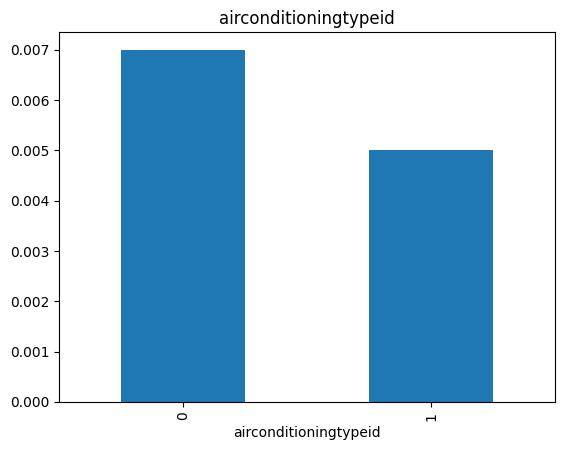

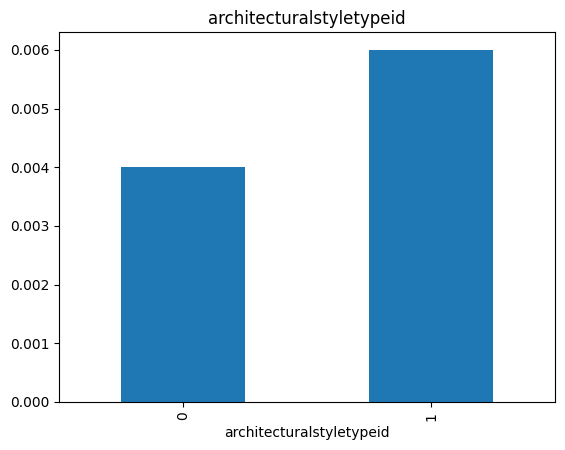

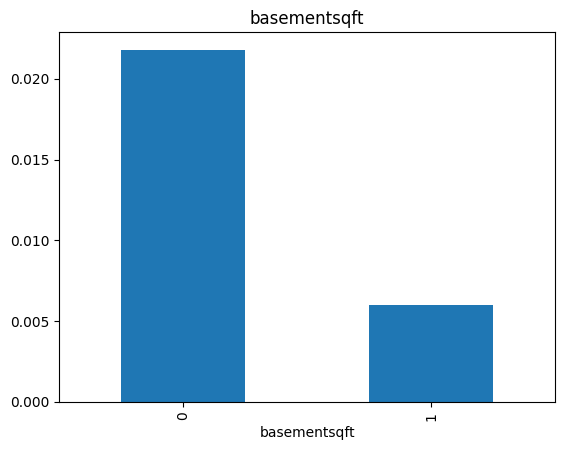

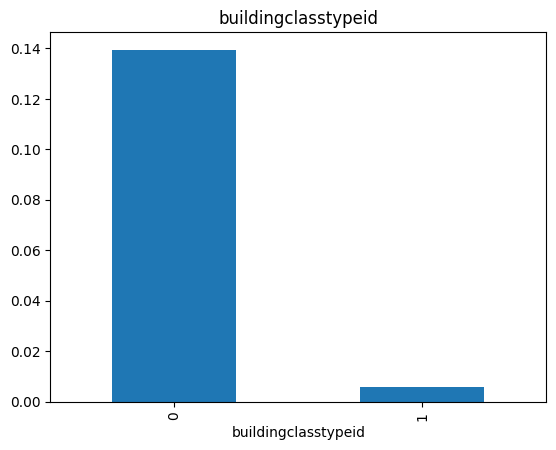

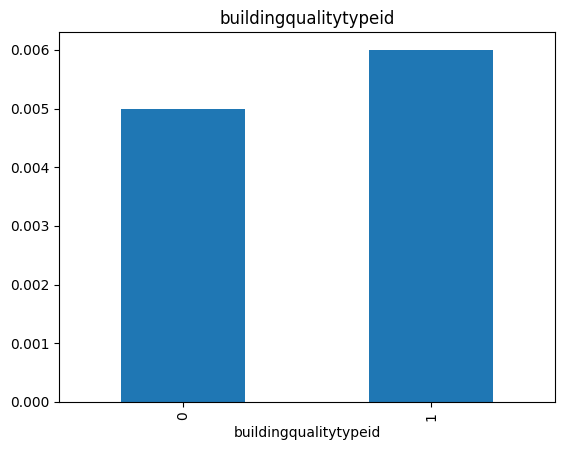

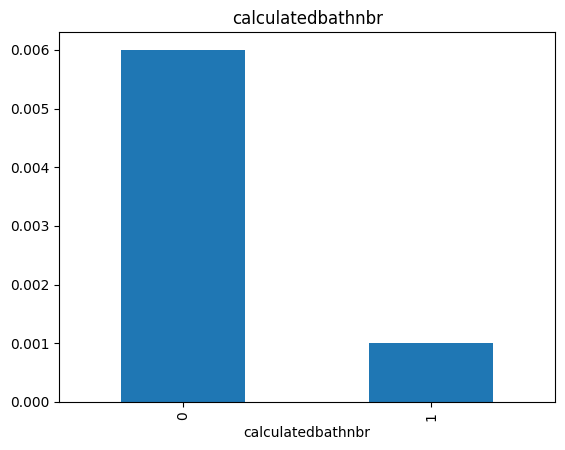

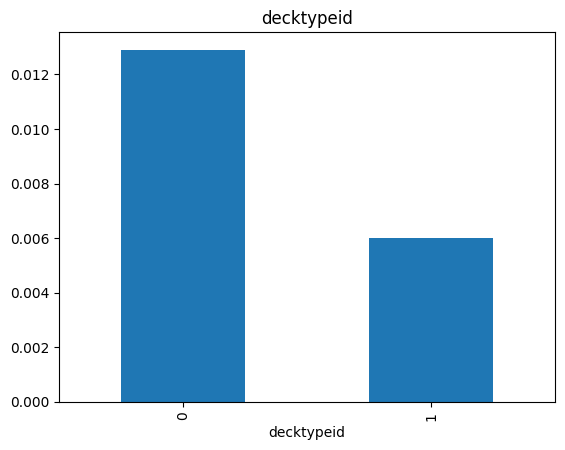

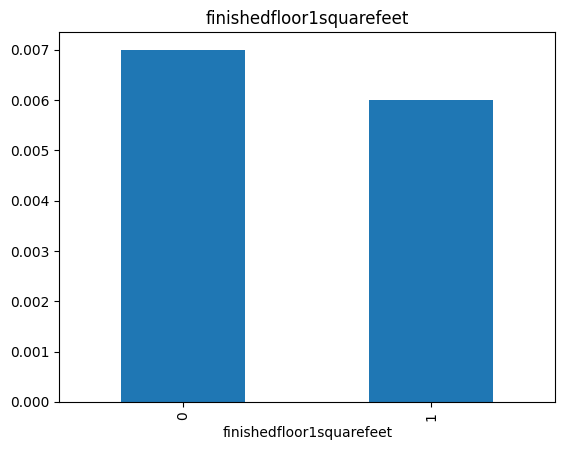

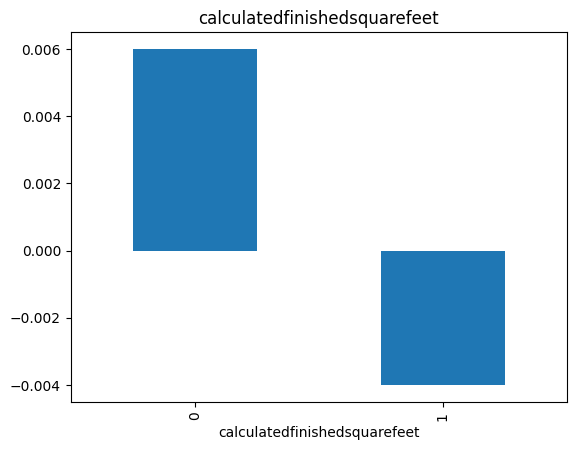

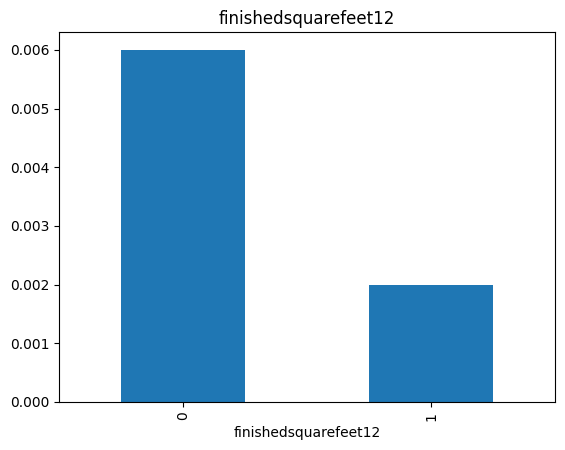

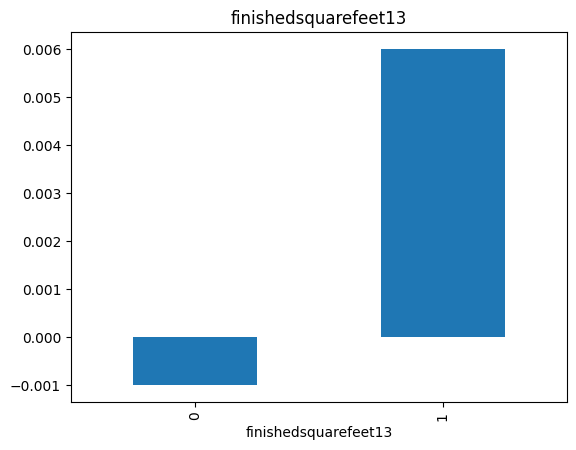

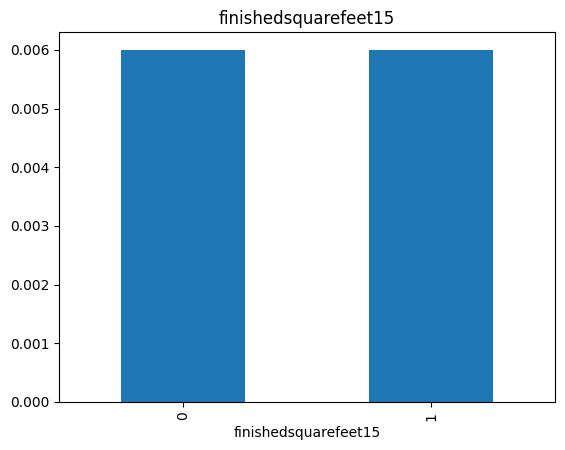

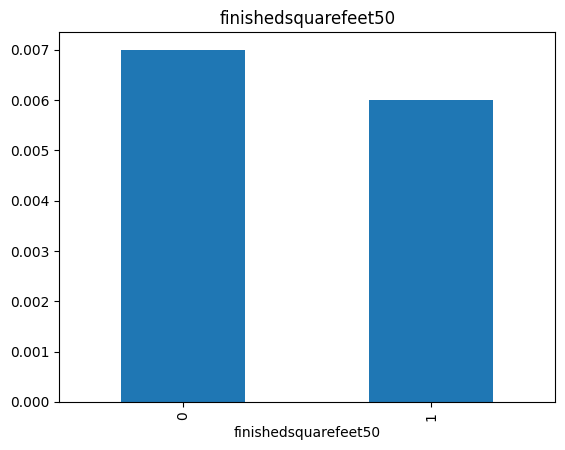

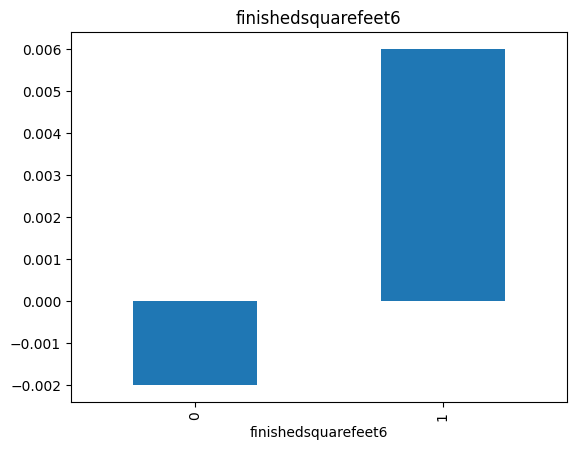

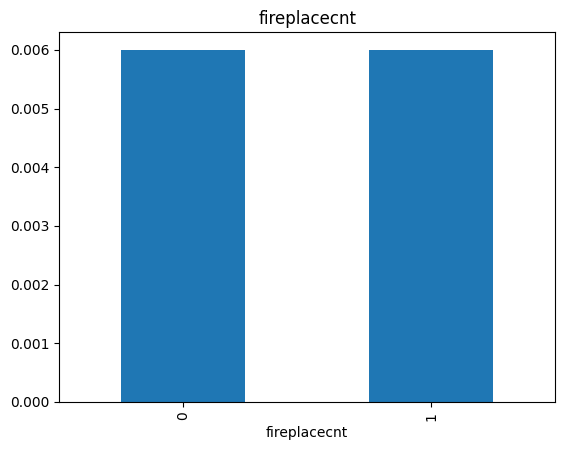

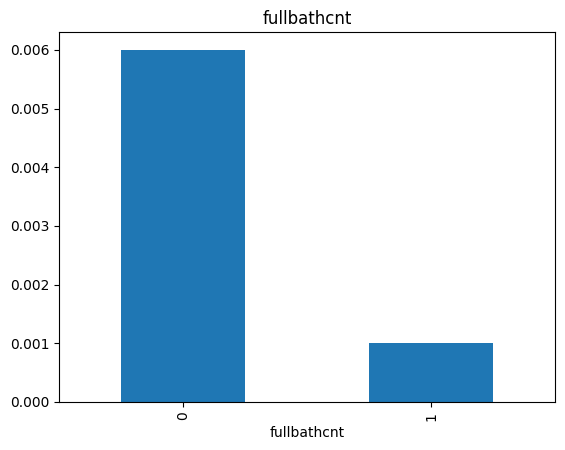

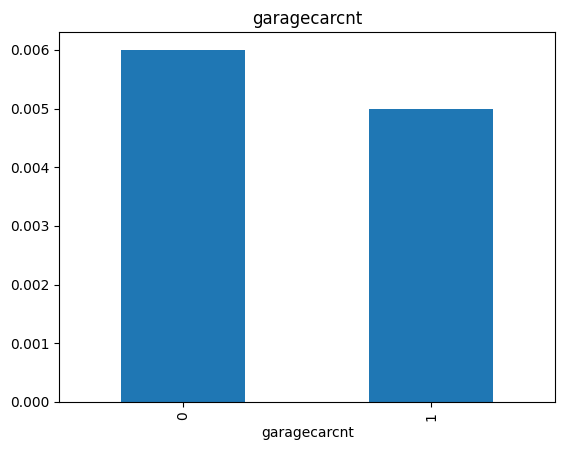

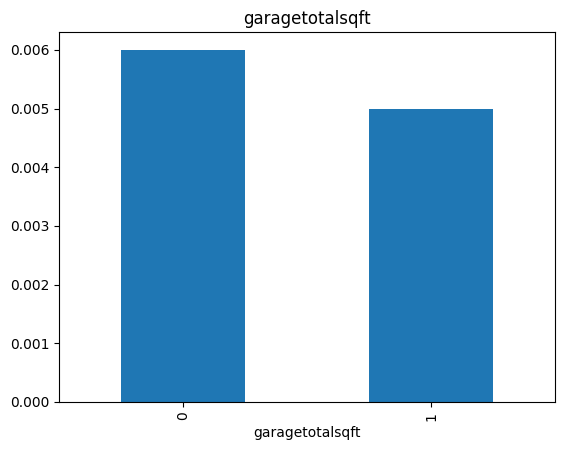

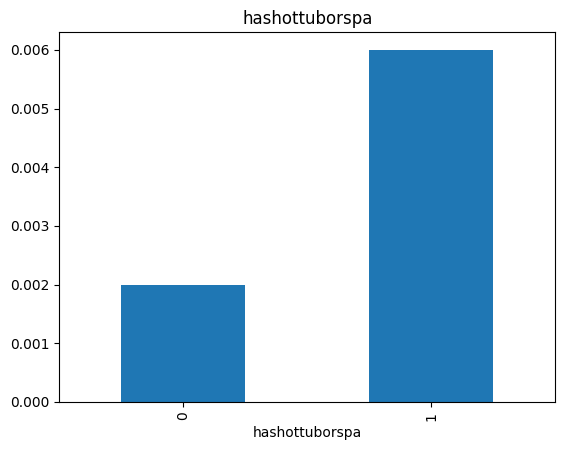

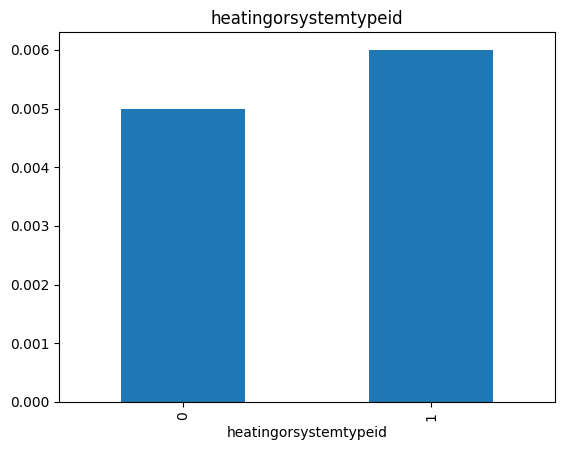

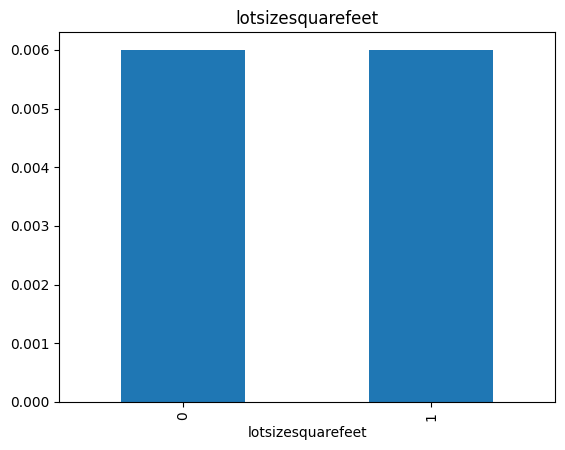

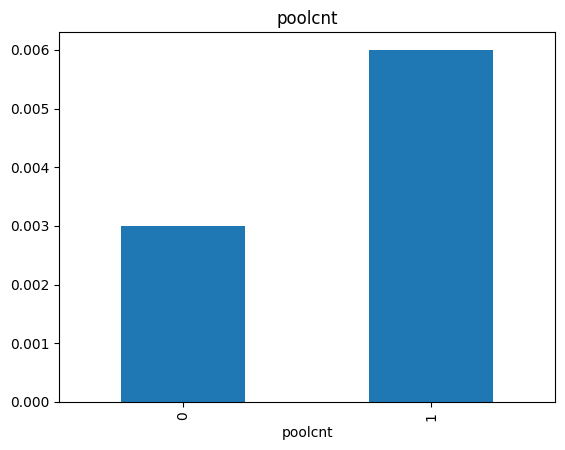

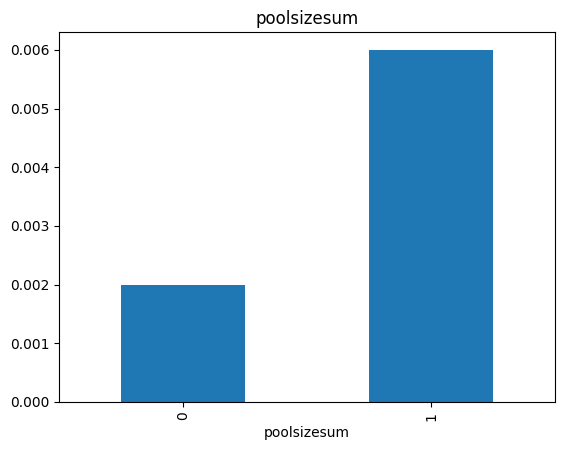

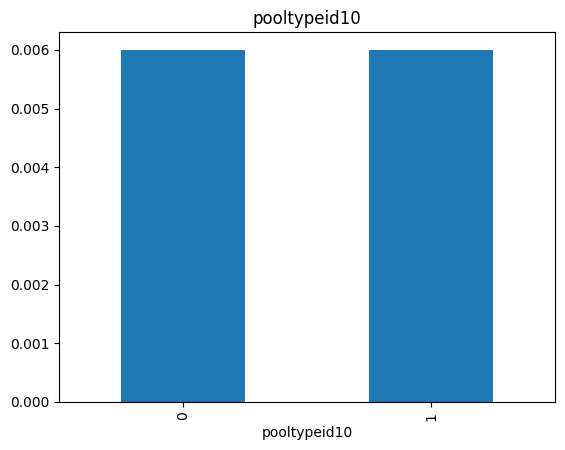

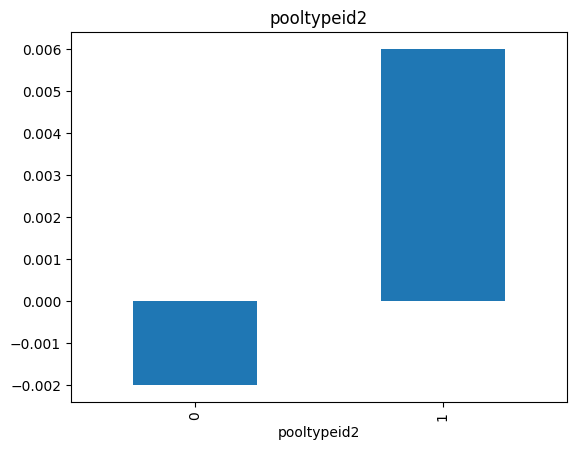

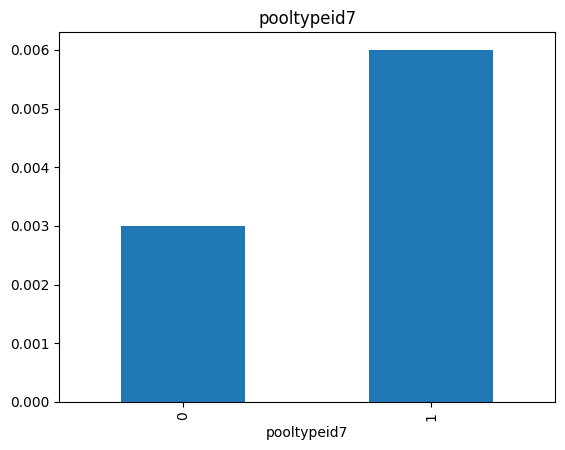

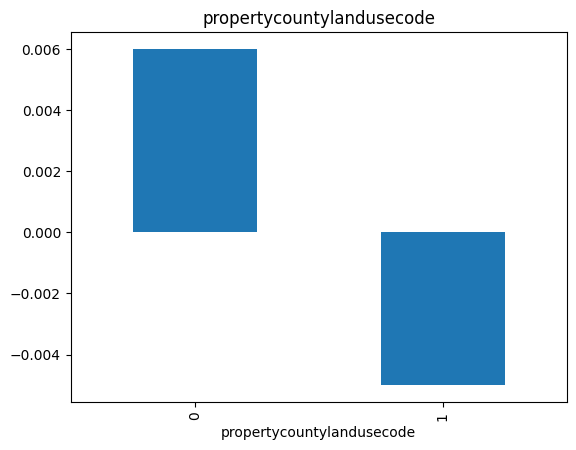

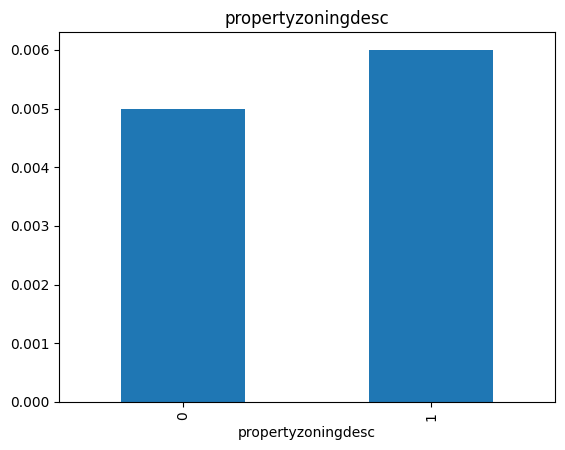

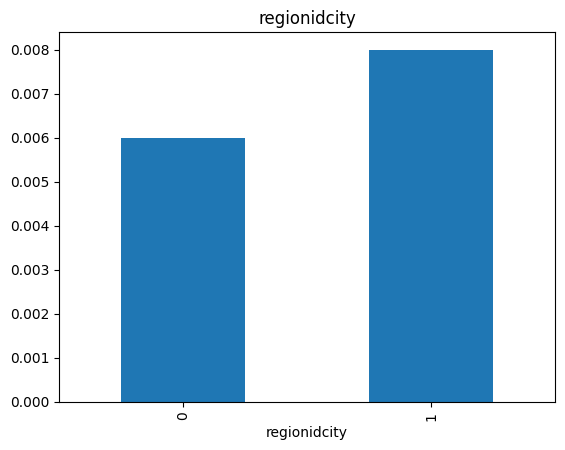

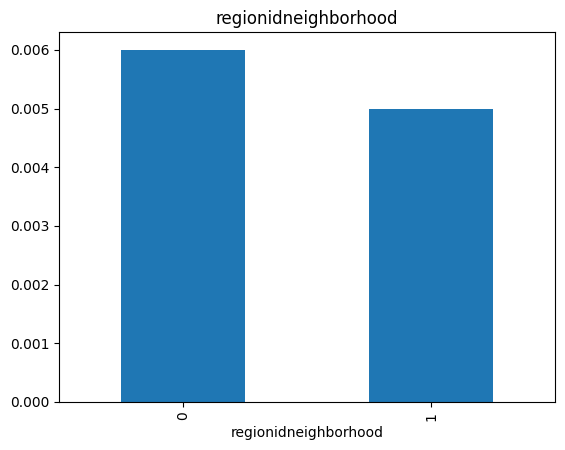

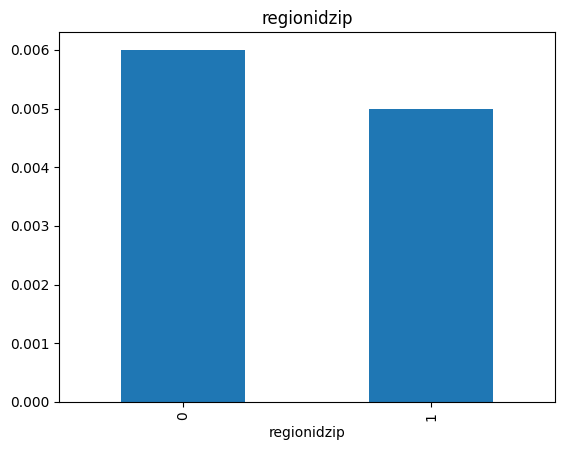

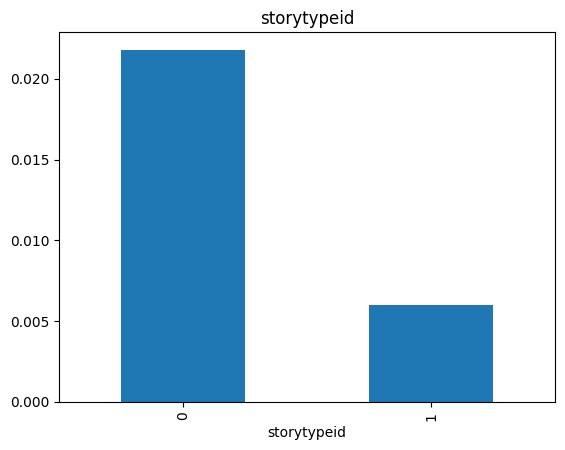

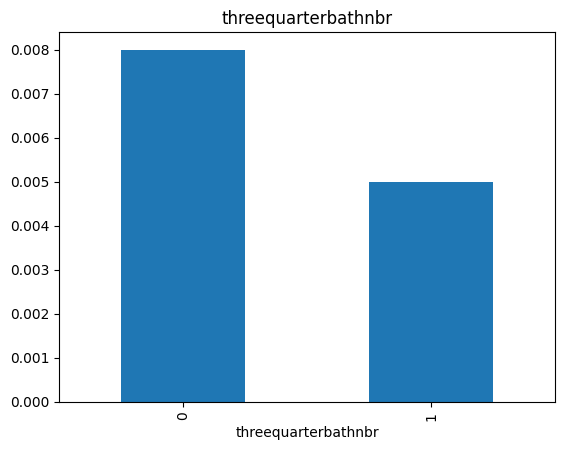

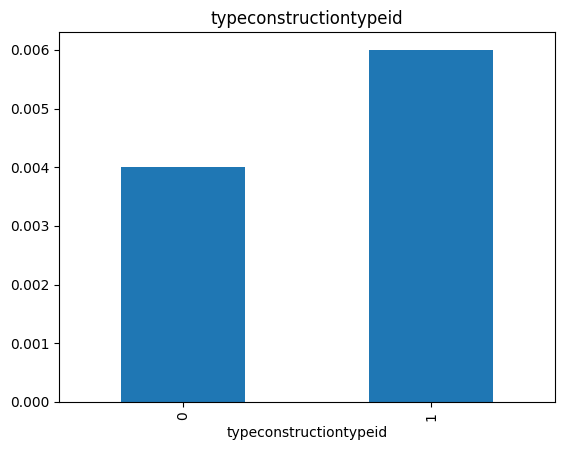

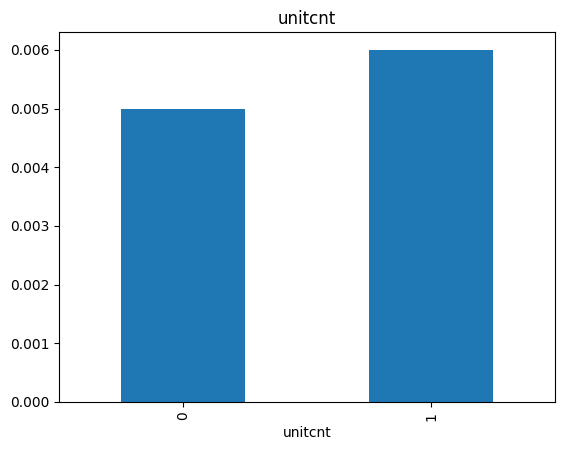

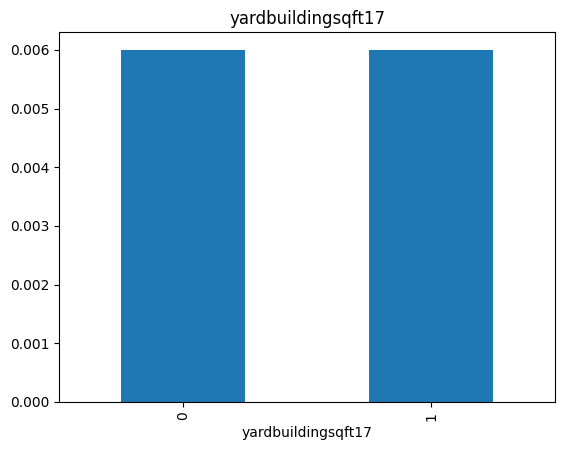

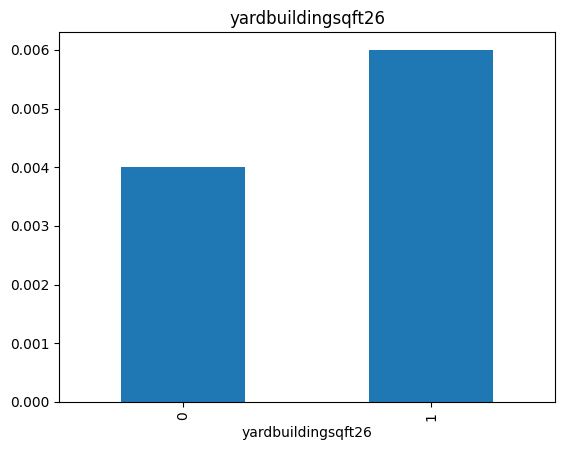

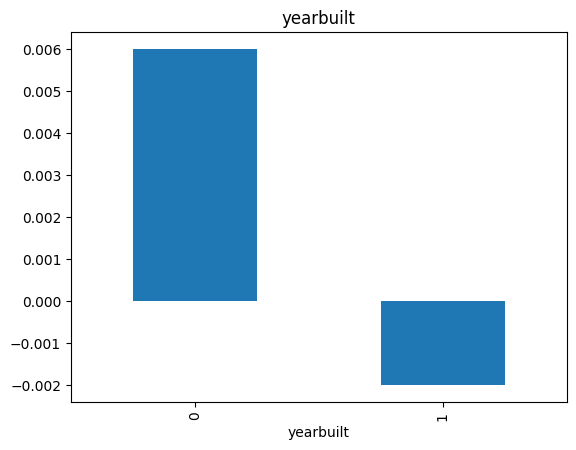

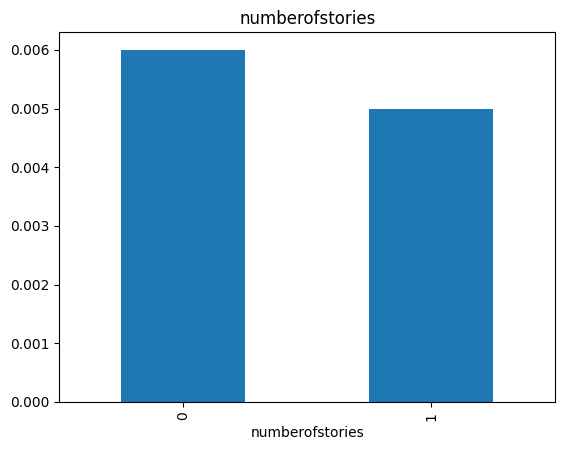

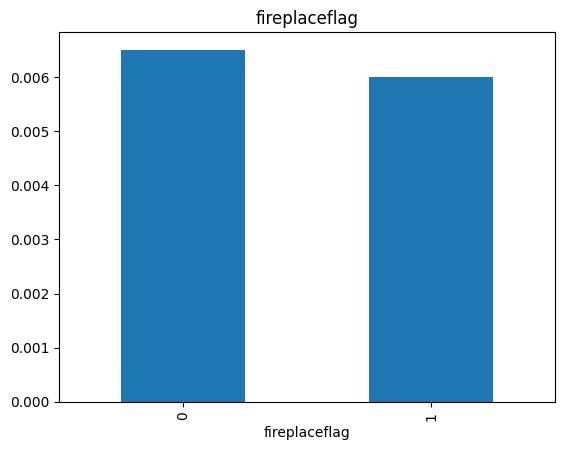

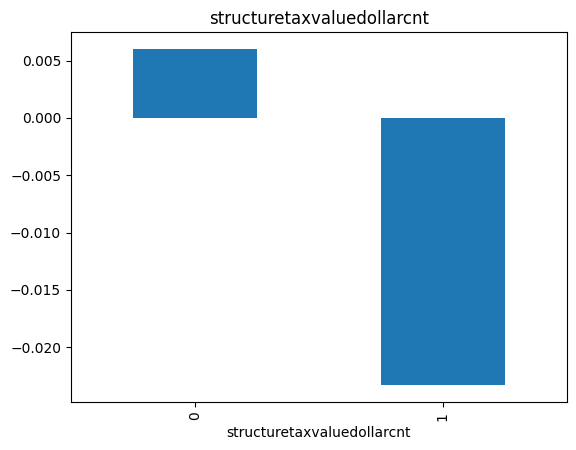

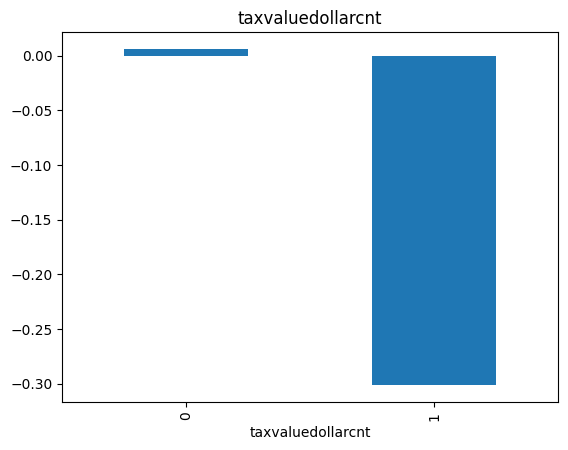

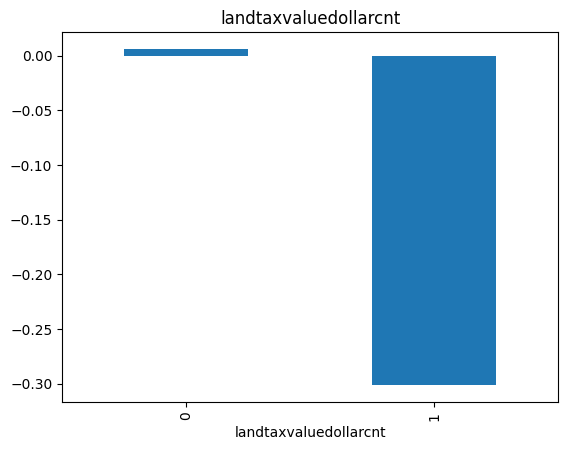

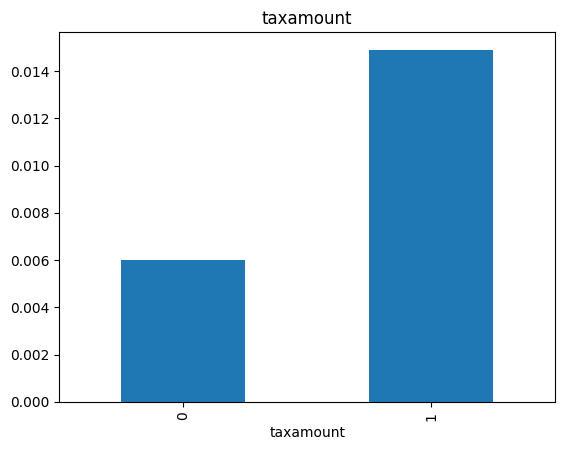

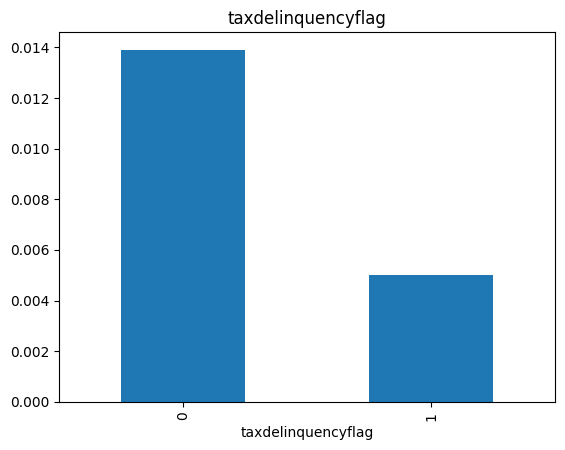

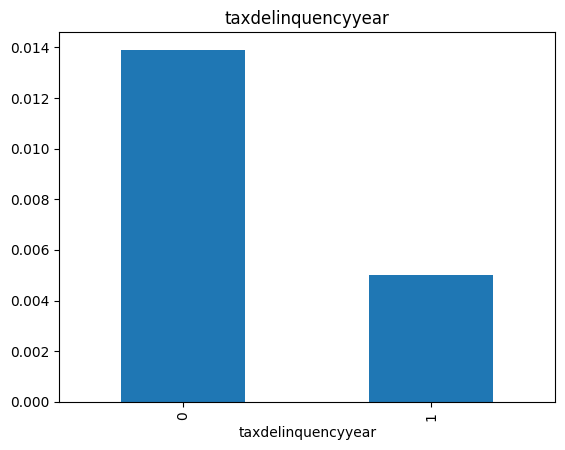

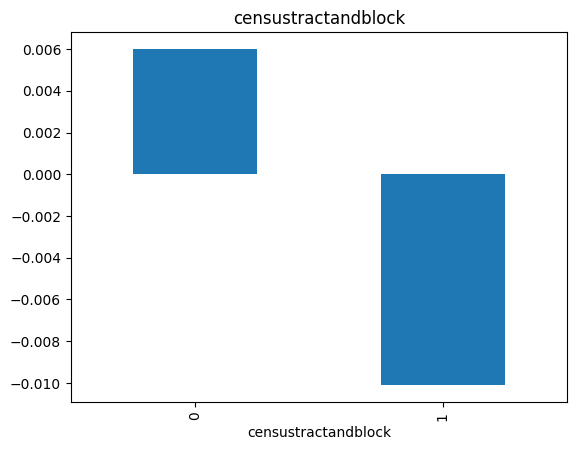

In [29]:
def analyze_missing_values(df, var):
    new_df = df.copy()
    new_df[var] = np.where(new_df[var].isnull(), 1, 0)
    new_df.groupby(var)['logerror'].median().plot.bar()
    plt.title(var)
    plt.show()

for var in mis_val:
    analyze_missing_values(zillow_df, var)

In [30]:
print("Total no of variables with missing value in the dataset: ", len(mis_val))

Total no of variables with missing value in the dataset:  47


#### **Numerical Variables**

In [32]:
num_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes != 'O']
print("Total no of numerical variables in the dataset: ", len(num_vars))

Total no of numerical variables in the dataset:  54


In [33]:
zillow_df[num_vars].head()

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17073783                    NaN                       NaN           NaN   
1  17088994                    NaN                       NaN           NaN   
2  17100444                    NaN                       NaN           NaN   
3  17102429                    NaN                       NaN           NaN   
4  17109604                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          2.5         3.0                  NaN                    NaN   
1          1.0         2.0                  NaN                    NaN   
2          2.0         3.0                  NaN                    NaN   
3          1.5         2.0                  NaN                    NaN   
4          2.5         4.0                  NaN                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                2.5         NaN                     548.0   
1                1.0         NaN                     777.0   
2                2.0         NaN                    1101.0   
3                1.5         NaN                    1554.0   
4                2.5         NaN                    1305.0   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                        1264.0                1264.0                   NaN   
1                         777.0                 777.0                   NaN   
2                        1101.0                1101.0                   NaN   
3                        1554.0                1554.0                   NaN   
4                        2415.0                2415.0                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6    fips  \
0                   NaN                 548.0                  NaN  6111.0   
1                   NaN                 777.0                  NaN  6111.0   
2                   NaN                1101.0                  NaN  6111.0   
3                   NaN                1554.0                  NaN  6111.0   
4                   NaN                1305.0                  NaN  6111.0   

   fireplacecnt  fullbathcnt  garagecarcnt  garagetotalsqft  \
0           NaN          2.0           2.0              0.0   
1           NaN          1.0           1.0              0.0   
2           NaN          2.0           2.0            441.0   
3           1.0          1.0           2.0            460.0   
4           1.0          2.0           2.0            665.0   

   heatingorsystemtypeid    latitude    longitude  lotsizesquarefeet  poolcnt  \
0                    NaN  34303597.0 -119287236.0             1735.0      NaN   
1                    NaN  34272866.0 -119198911.0                NaN      NaN   
2                    NaN  34340801.0 -119079610.0             6569.0      NaN   
3                    NaN  34354313.0 -119076405.0             7400.0      NaN   
4                    NaN  34266578.0 -119165392.0             6326.0      NaN   

   poolsizesum  pooltypeid10  pooltypeid2  pooltypeid7  propertylandusetypeid  \
0          NaN           NaN          NaN          NaN                  265.0   
1          NaN           NaN          NaN          NaN                  266.0   
2          NaN           NaN          NaN          NaN                  261.0   
3          NaN           NaN          NaN          NaN                  261.0   
4          NaN           NaN          NaN          NaN                  261.0   

   rawcensustractandblock  regionidcity  regionidcounty  regionidneighborhood  \
0            6.111002e+07       34543.0          2061.0                   NaN   
1            6.111002e+07       34543.0          2061.0                   NaN   
2            6.111001e+07       26965.0          2061.0                   NaN   
3            6.111001e+07       26965.0          2061.0                   NaN   
4            6

#### **Categorical Variables**

In [35]:
cat_vars = [var for var in zillow_df.columns if zillow_df[var].dtypes == 'O']
print("Total no of categorical variables in the dataset: ", len(cat_vars))

Total no of categorical variables in the dataset:  6


In [36]:
zillow_df[cat_vars].head()

hashottuborspa propertycountylandusecode propertyzoningdesc fireplaceflag  \
0            NaN                      1128                NaN           NaN   
1            NaN                      1129                NaN           NaN   
2            NaN                      1111                NaN           NaN   
3            NaN                      1110                NaN           NaN   
4            NaN                      1111                NaN           NaN   

  taxdelinquencyflag transactiondate  
0                NaN      2016-01-27  
1                NaN      2016-03-30  
2                NaN      2016-05-27  
3                NaN      2016-06-07  
4                NaN      2016-08-08

#### **Cardinality of Categorical Variables**

In [38]:
for var in cat_vars:
    print(var, len(zillow_df[var].unique()), " Categories")

hashottuborspa 2  Categories
propertycountylandusecode 78  Categories
propertyzoningdesc 1997  Categories
fireplaceflag 2  Categories
taxdelinquencyflag 2  Categories
transactiondate 352  Categories


In [39]:
def analyze_rare_labels(df, var, rare_perc):
    new_df = df.copy()
    # determine the % of observations per category
    tmp = new_df.groupby(var)['logerror'].count() / len(new_df)
    # return categories that are rare
    return tmp[tmp < rare_perc]

# print categories that are present in less than 1 % of the observations
for var in cat_vars:
    print(analyze_rare_labels(zillow_df, var, 0.01))
    print()

Series([], Name: logerror, dtype: float64)

propertycountylandusecode
0       0.000011
010     0.000011
0102    0.000033
0103    0.001108
0104    0.003855
          ...   
38      0.001174
6050    0.000011
73      0.000122
8800    0.000011
96      0.001152
Name: logerror, Length: 65, dtype: float64

propertyzoningdesc
1NR1*         0.000044
1NR3*         0.000033
AH RM-CD*     0.000089
AH RM-CD-F    0.000044
AH RS(3)10    0.000011
                ...   
WVRPD40000    0.000011
WVRPD4OOOO    0.000222
WVRPD56*      0.000033
WVRR          0.000022
WVRR1-RPD1    0.000100
Name: logerror, Length: 1988, dtype: float64

fireplaceflag
True    0.002459
Name: logerror, dtype: float64

Series([], Name: logerror, dtype: float64)

transactiondate
2016-01-01    0.000033
2016-01-02    0.000066
2016-01-03    0.000554
2016-01-04    0.002880
2016-01-05    0.003201
                ...   
2016-12-26    0.000166
2016-12-27    0.000565
2016-12-28    0.000864
2016-12-29    0.001296
2016-12-30    0.001041
Name:

#### **Temporal Variables**

In [41]:
year_var = [var for var in num_vars if 'Yr' in var or 'year' in var]
len(year_var), year_var

(3, ['yearbuilt', 'assessmentyear', 'taxdelinquencyyear'])

#### **Relationship Between Temporal Variables and Log Error**

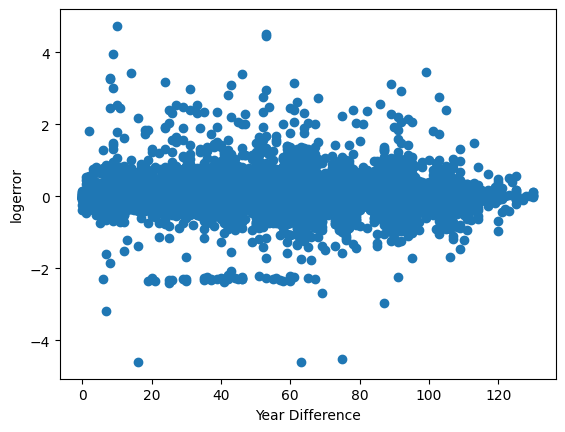

In [43]:
# Relationship between temporal variables and log error:
new_df = zillow_df.copy()

# calculate difference between year variable and year the house was sold
new_df[var] = new_df['assessmentyear'] - new_df['yearbuilt']

plt.scatter(new_df[var], new_df['logerror'])
plt.xlabel('Year Difference')
plt.ylabel('logerror')
plt.show()

#### **Discrete Variables**

In [45]:
discrete_vars = [var for var in num_vars if len(zillow_df[var].unique()) < 20]
print('No of discrete variables : ', len(discrete_vars))

No of discrete variables :  26


In [46]:
zillow_df[discrete_vars].head()

airconditioningtypeid  architecturalstyletypeid  bedroomcnt  \
0                    NaN                       NaN         3.0   
1                    NaN                       NaN         2.0   
2                    NaN                       NaN         3.0   
3                    NaN                       NaN         2.0   
4                    NaN                       NaN         4.0   

   buildingclasstypeid  buildingqualitytypeid  decktypeid  \
0                  NaN                    NaN         NaN   
1                  NaN                    NaN         NaN   
2                  NaN                    NaN         NaN   
3                  NaN                    NaN         NaN   
4                  NaN                    NaN         NaN   

   finishedsquarefeet13    fips  fireplacecnt  fullbathcnt  garagecarcnt  \
0                   NaN  6111.0           NaN          2.0           2.0   
1                   NaN  6111.0           NaN          1.0           1.0   
2                   NaN  6111.0           NaN          2.0           2.0   
3                   NaN  6111.0           1.0          1.0           2.0   
4                   NaN  6111.0           1.0          2.0           2.0   

   heatingorsystemtypeid  poolcnt  pooltypeid10  pooltypeid2  pooltypeid7  \
0                    NaN      NaN           NaN          NaN          NaN   
1                    NaN      NaN           NaN          NaN          NaN   
2                    NaN      NaN           NaN          NaN          NaN   
3                    NaN      NaN           NaN          NaN          NaN   
4                    NaN      NaN           NaN          NaN          NaN   

   propertylandusetypeid  regionidcounty  roomcnt  storytypeid  \
0                  265.0          2061.0      5.0          NaN   
1                  266.0          2061.0      4.0          NaN   
2                  261.0          2061.0      5.0          NaN   
3                  261.0          2061.0      5.0          NaN   
4                  261.0          2061.0      8.0          NaN   

   threequarterbathnbr  typeconstructiontypeid  unitcnt  numberofstories  \
0                  1.0                     NaN      NaN              2.0   
1                  NaN                     NaN      NaN              1.0   
2                  NaN                     NaN      NaN              1.0   
3                  1.0                     NaN      NaN              1.0   
4                  1.0                     NaN      NaN              2.0   

   assessmentyear  taxdelinquencyyear  
0          2015.0                 NaN  
1          2015.0                 NaN  
2          2015.0                 NaN  
3          2015.0                 NaN  
4          2015.0                 NaN

#### **Continuous Variables**

In [48]:
cont_vars = [var for var in num_vars if var not in discrete_vars + year_var]
print('No of continuous variables : ', len(cont_vars))

No of continuous variables :  27


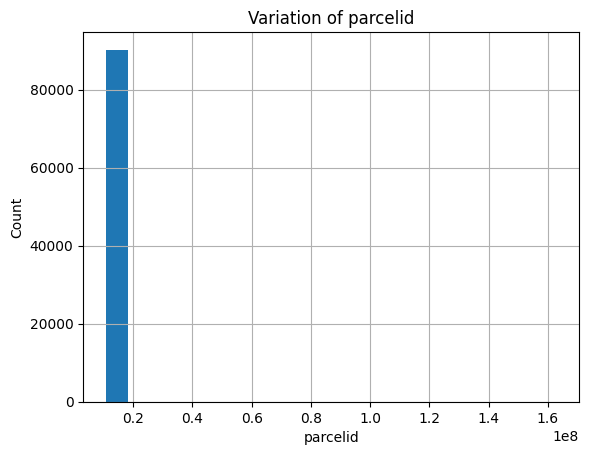

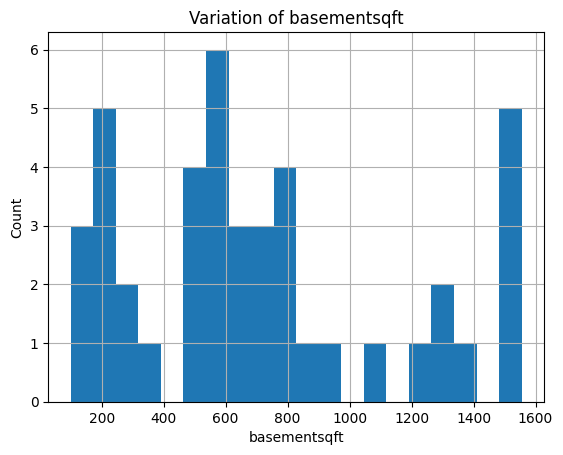

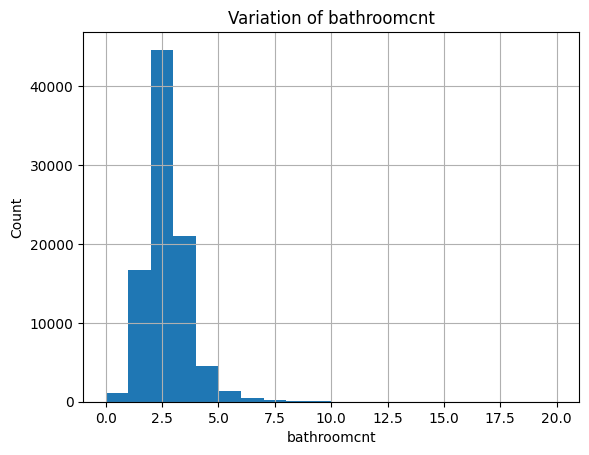

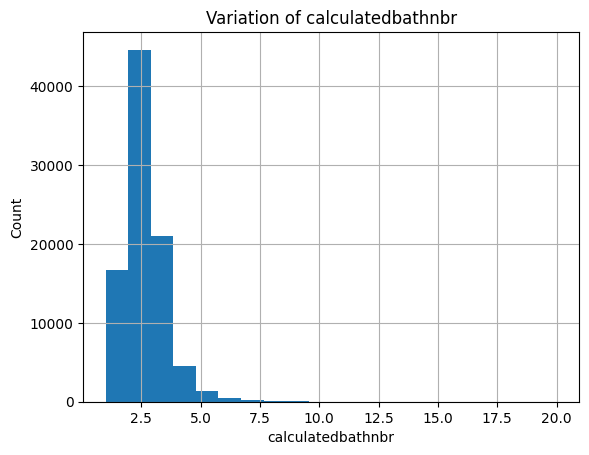

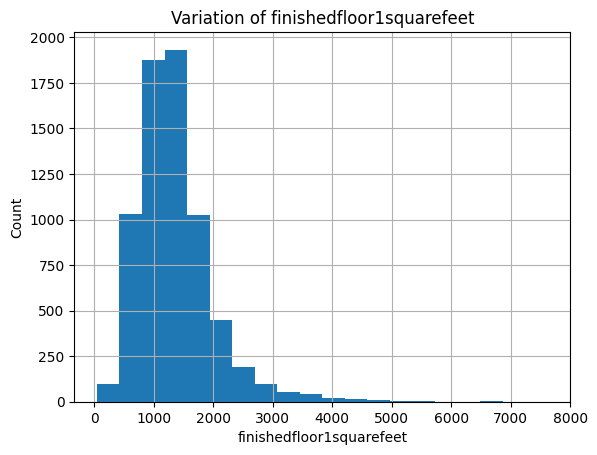

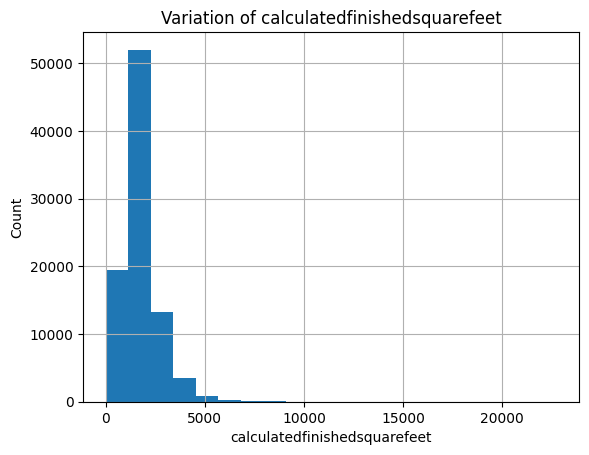

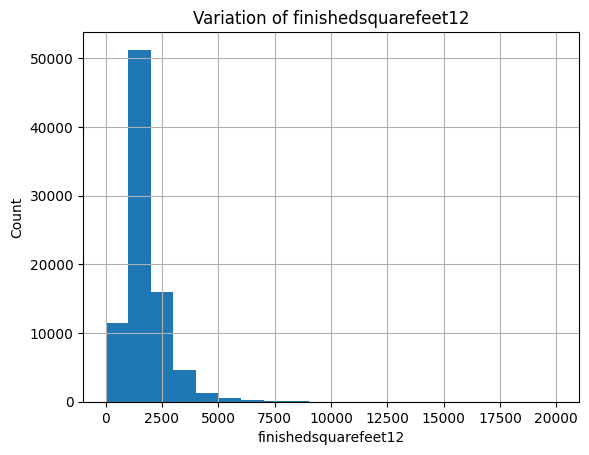

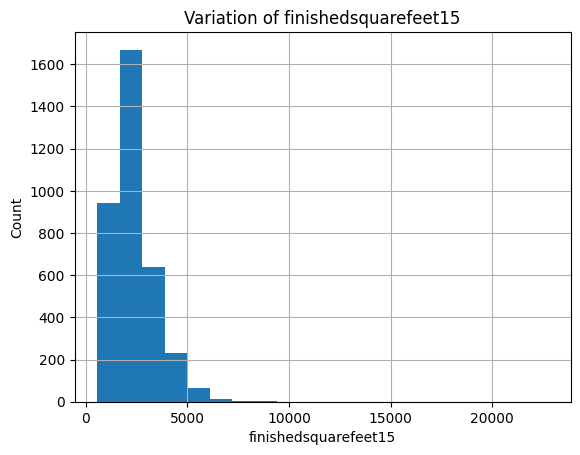

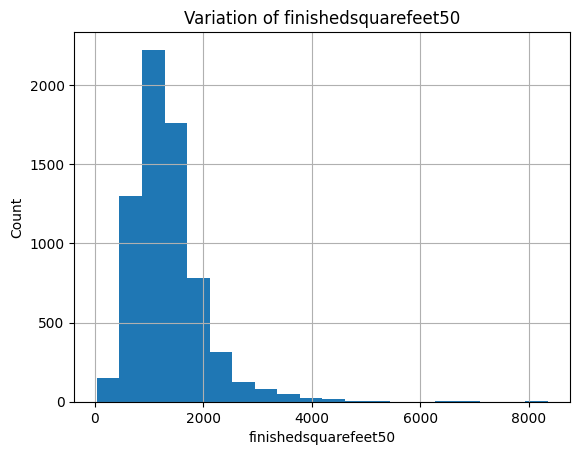

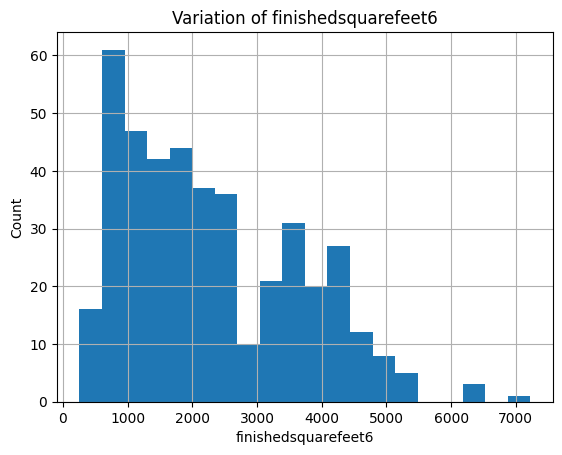

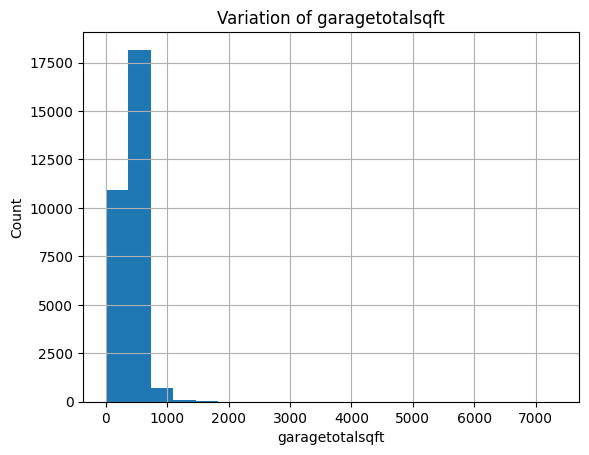

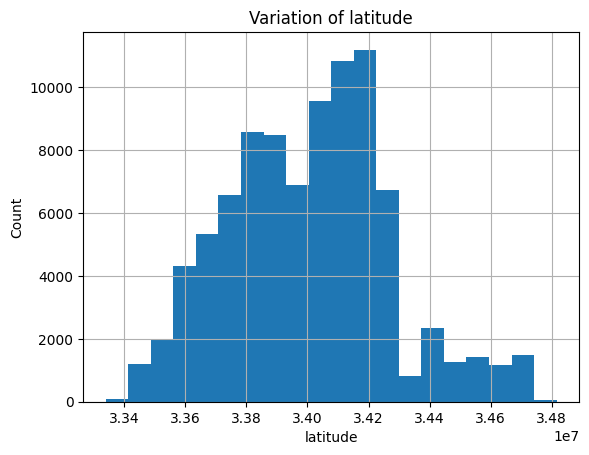

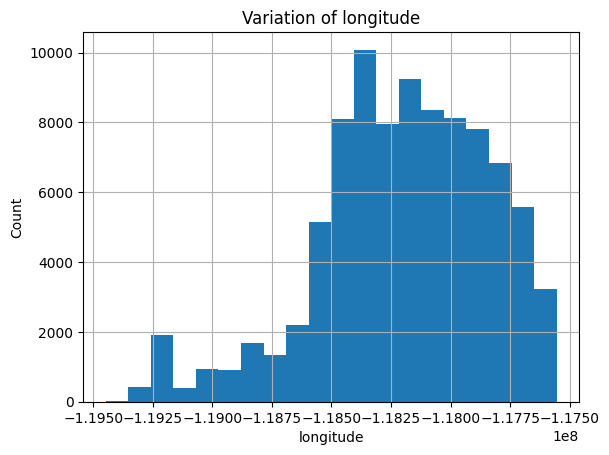

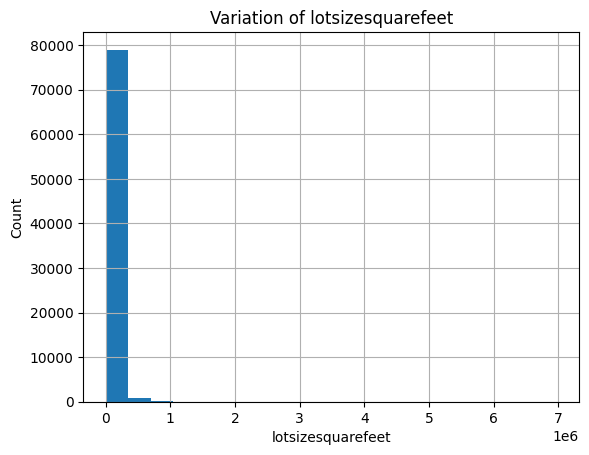

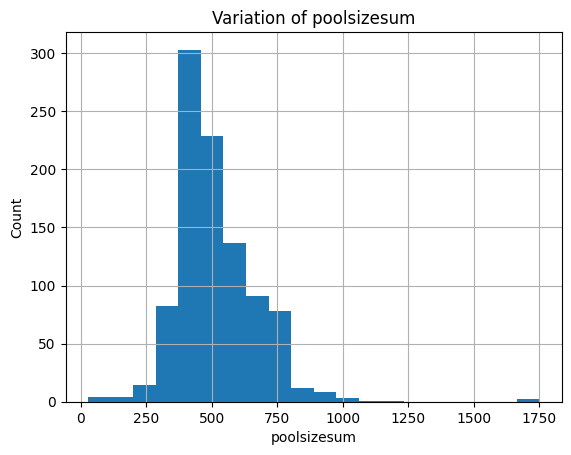

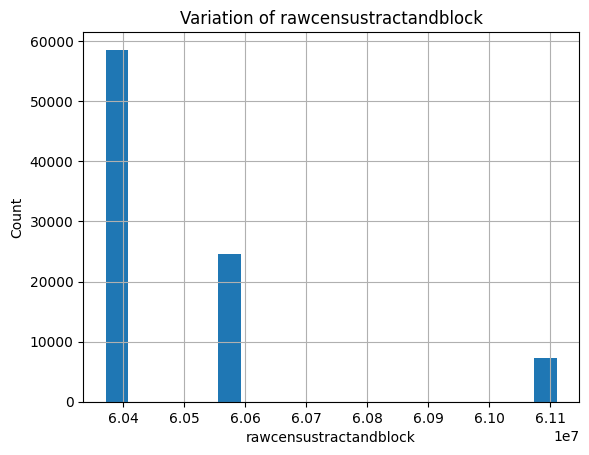

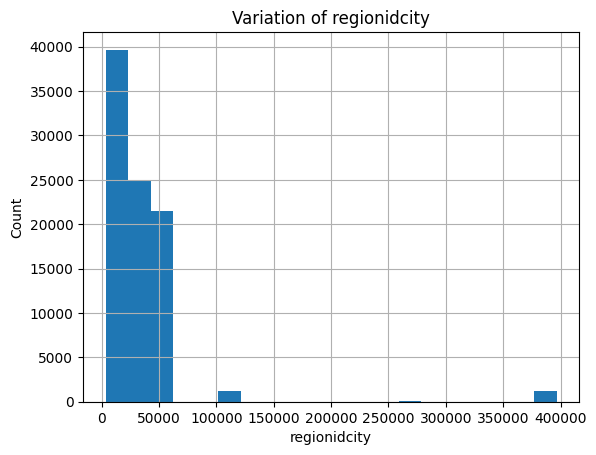

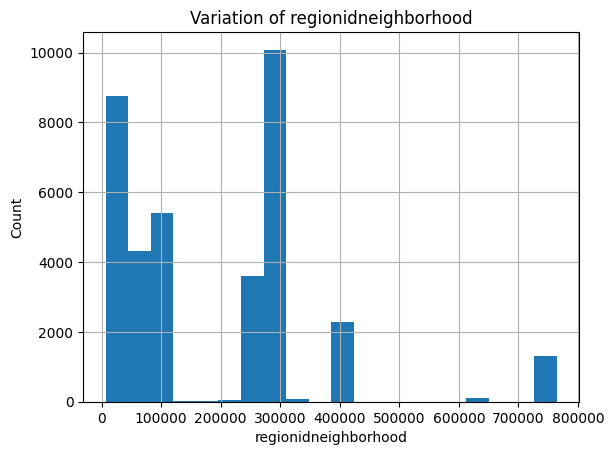

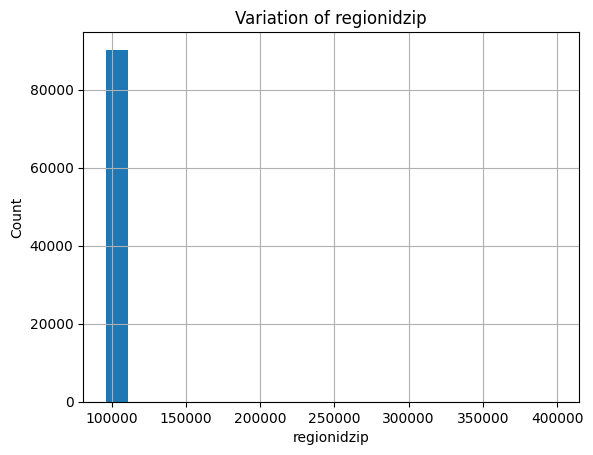

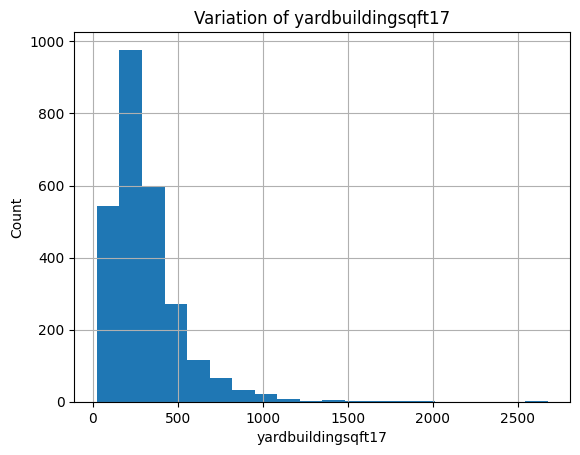

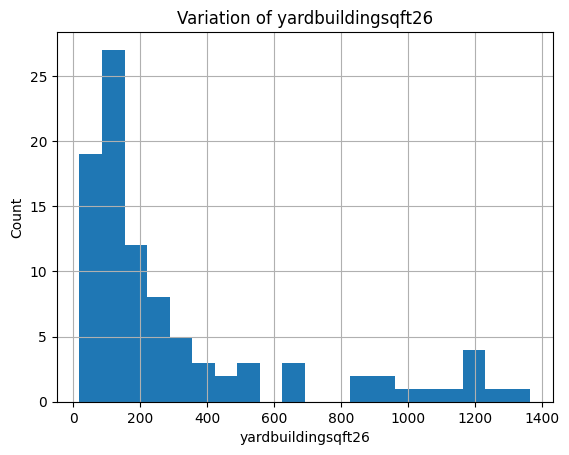

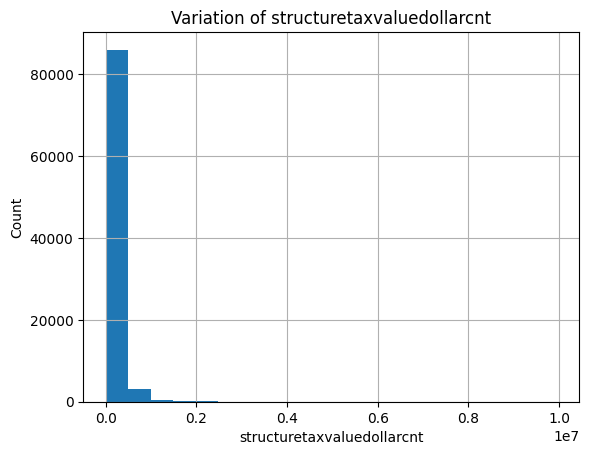

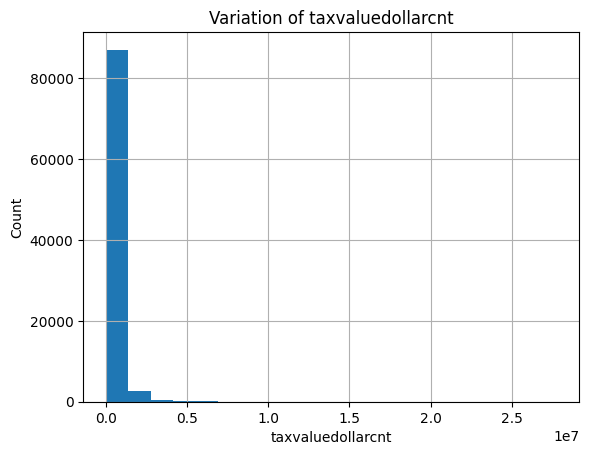

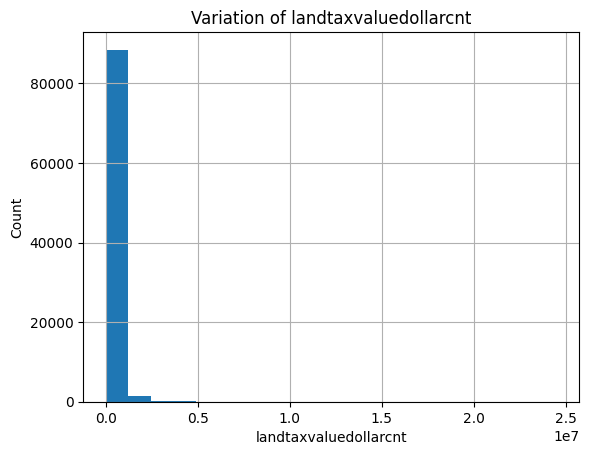

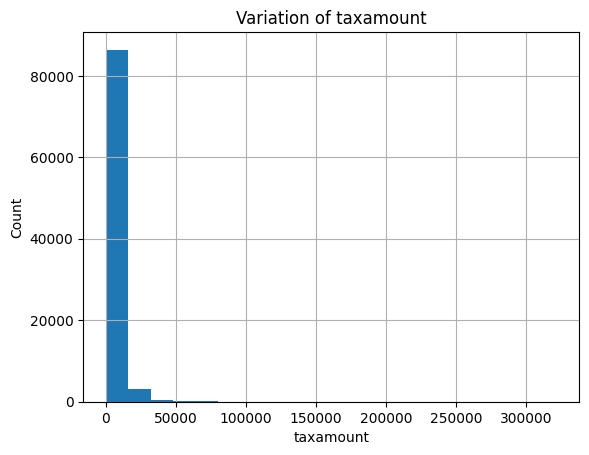

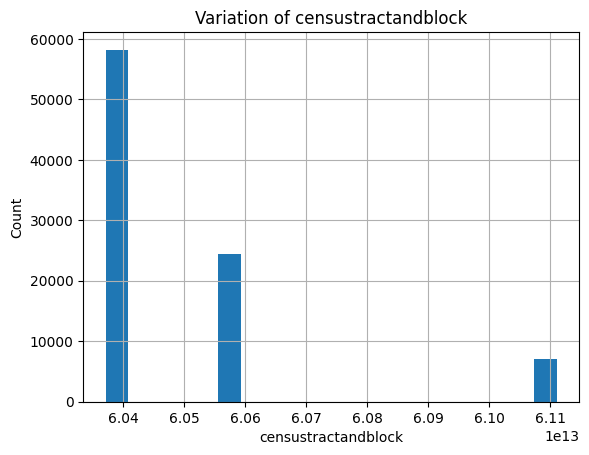

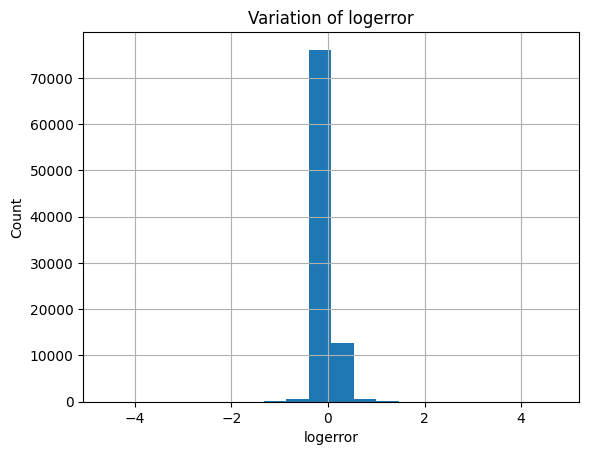

In [49]:
def analyze_cont_vars(df, var):
    new_df = zillow_df.copy()
    new_df[var].hist(bins=20)
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.title('Variation of ' + var)
    plt.show()

for var in cont_vars:
    analyze_cont_vars(zillow_df, var)

- #### Some of the variables are normally distributed.

#### **Logarithmetic transformation of the variables that follow a Normal Distribution**

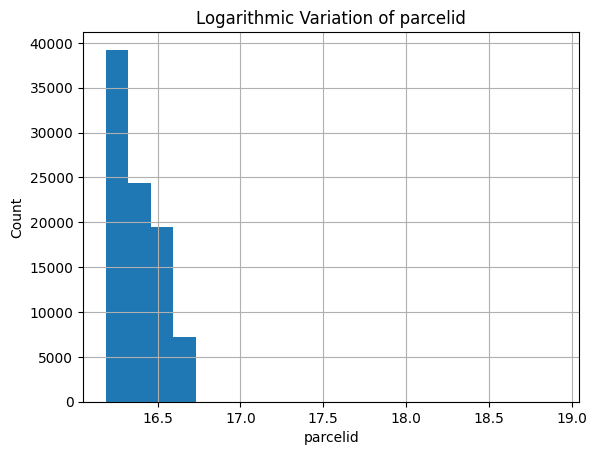

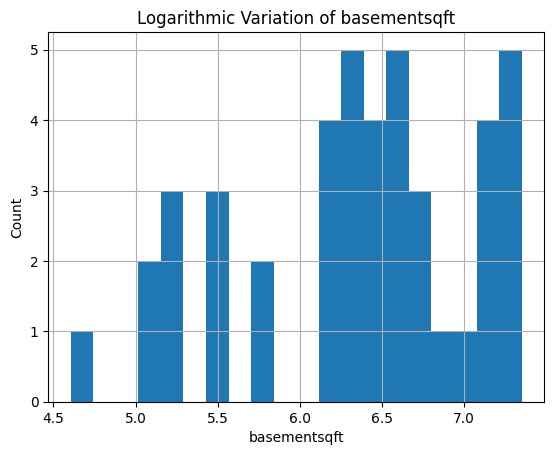

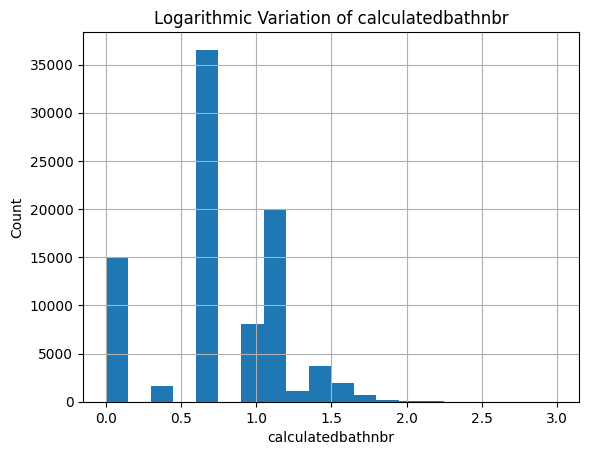

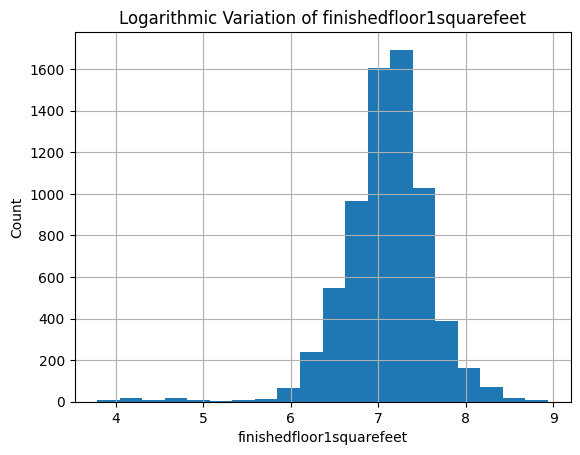

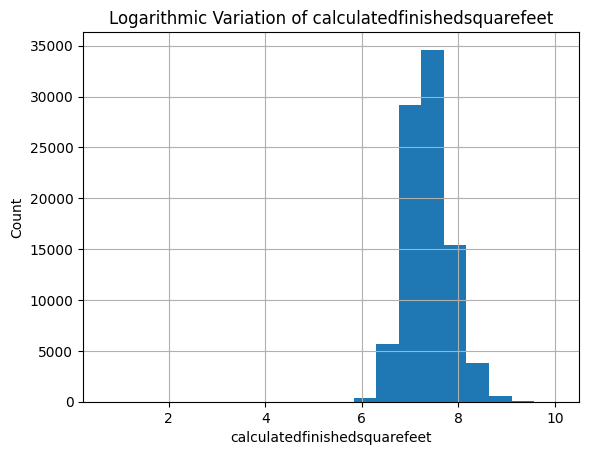

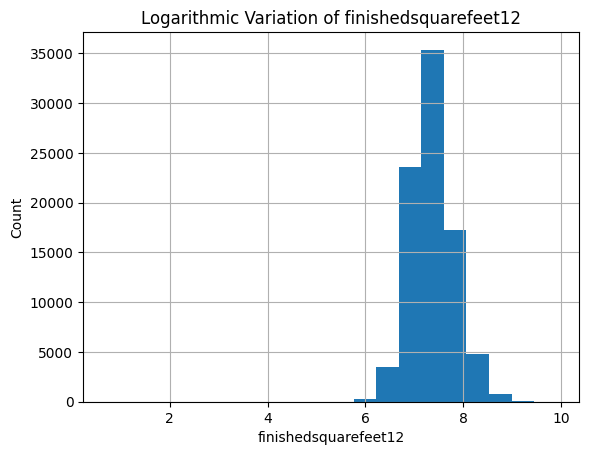

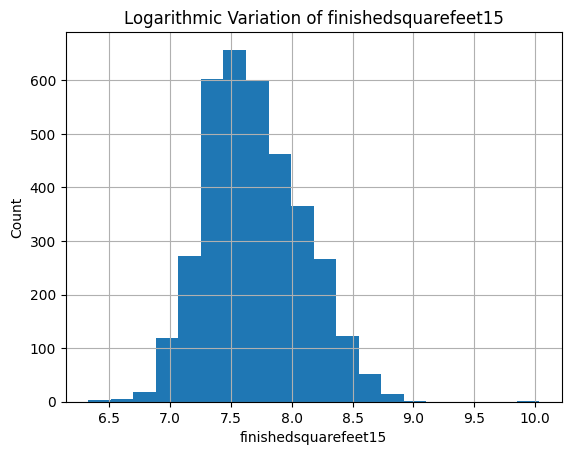

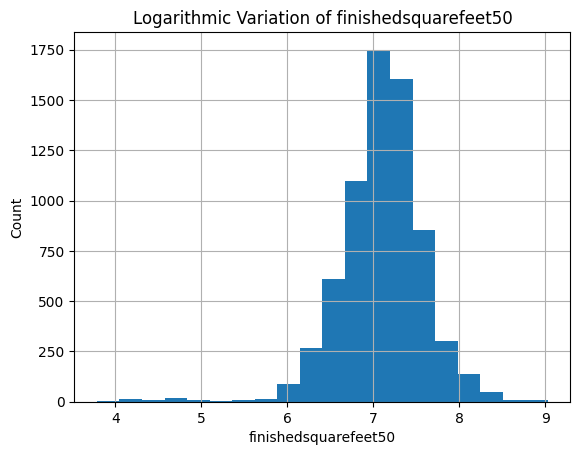

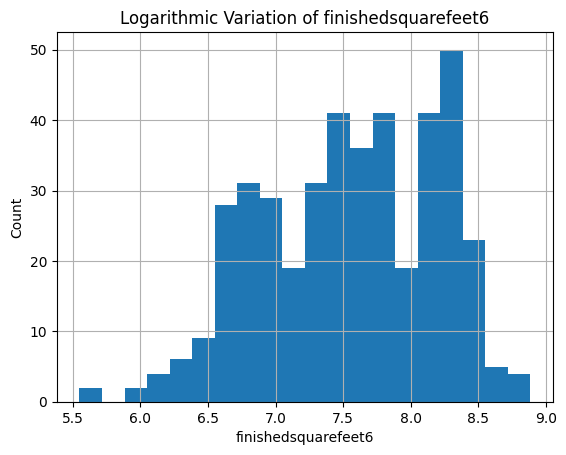

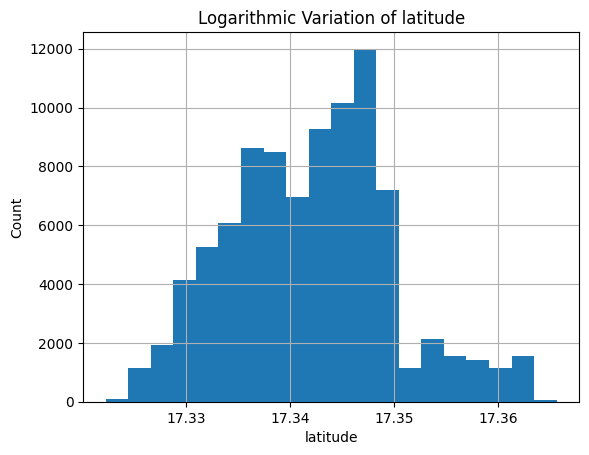

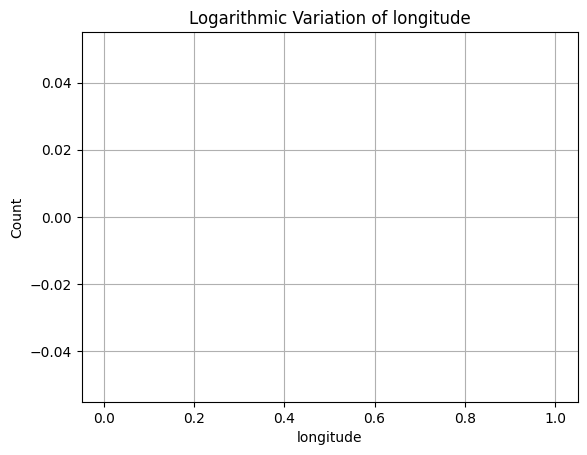

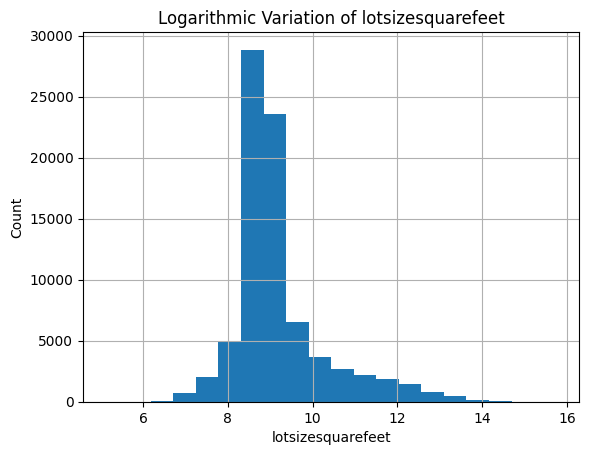

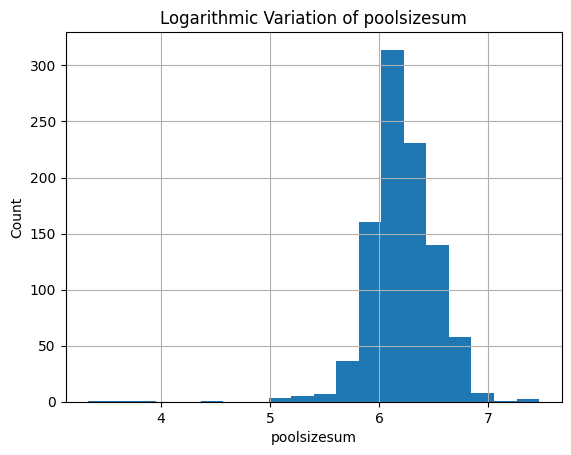

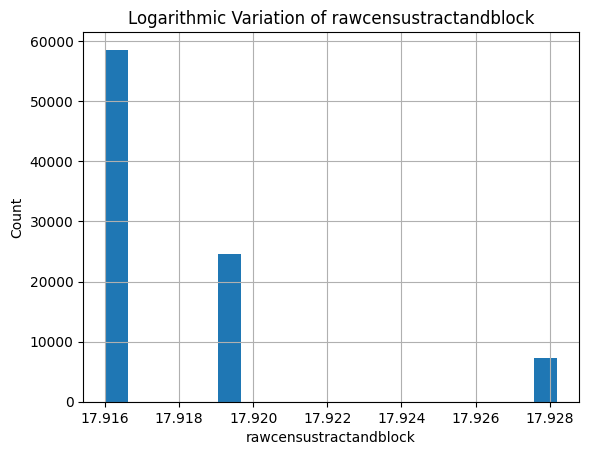

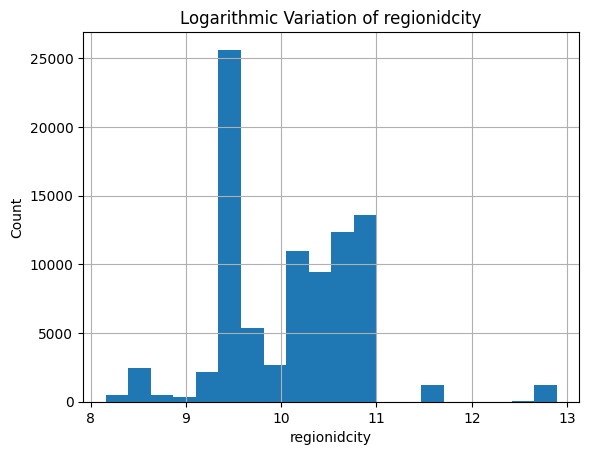

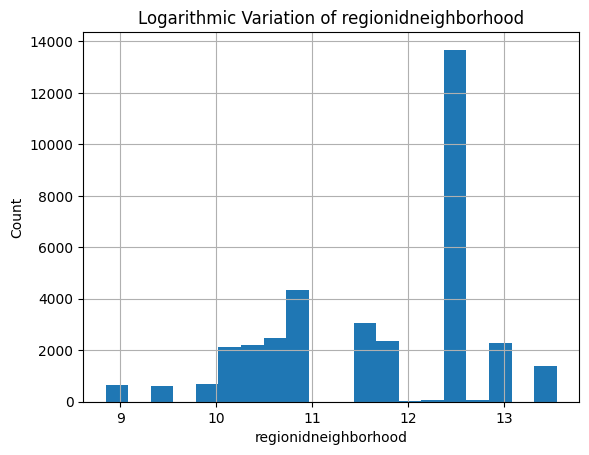

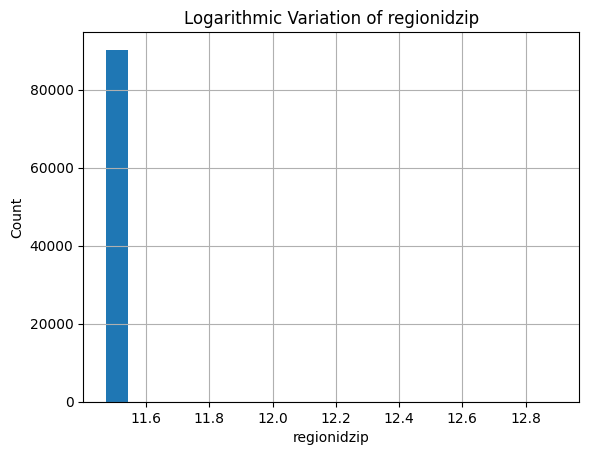

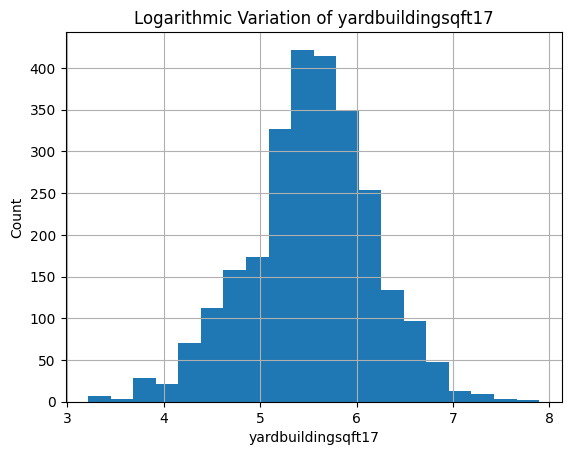

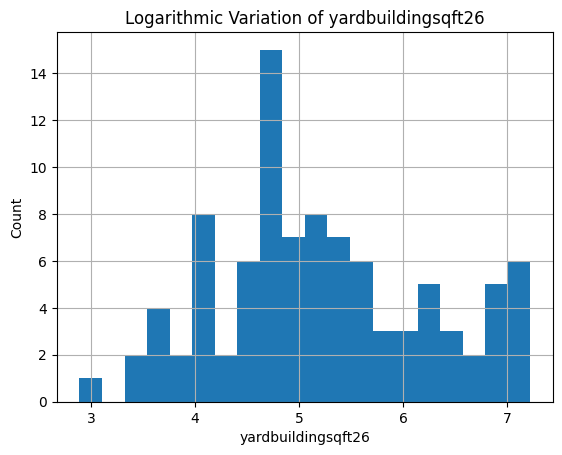

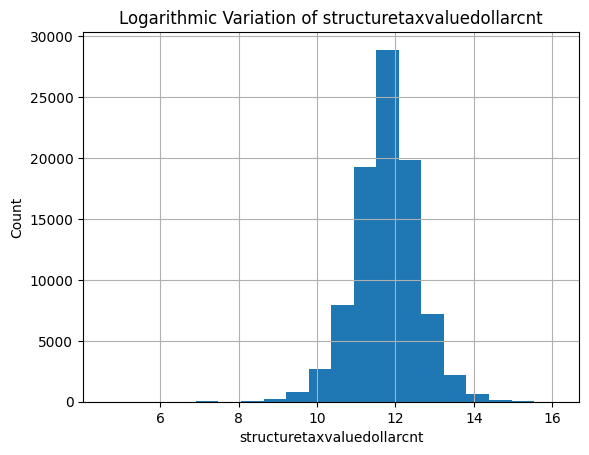

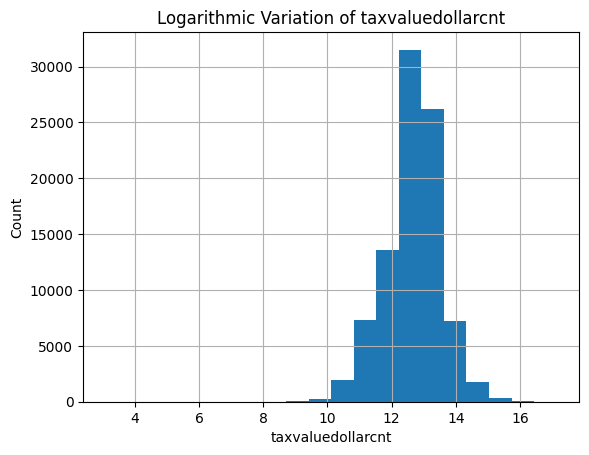

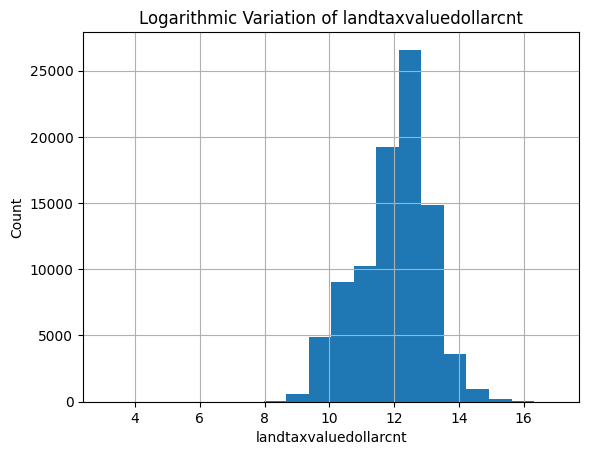

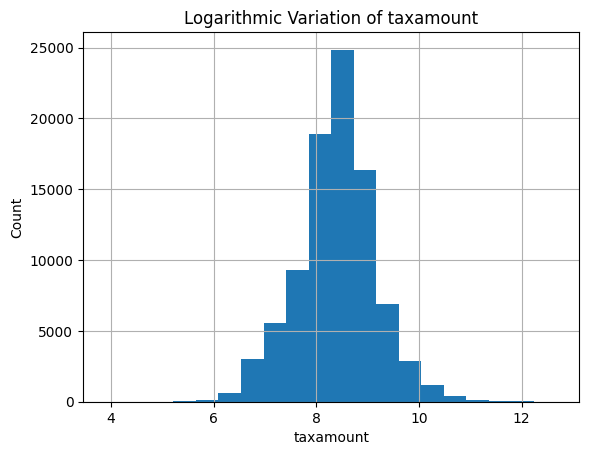

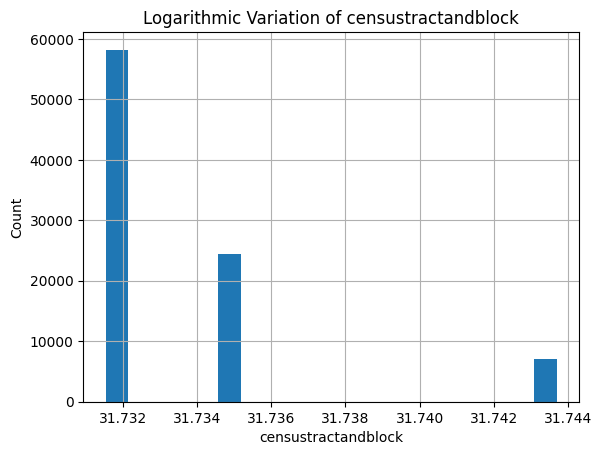

In [52]:
def analyze_log_variation(df, var):
    new_df = df.copy()
    if 0 in new_df[var].unique():
        pass
    else:
        # Log Transformation of variables
        new_df[var] = np.log(new_df[var])
        new_df[var].hist(bins=20)
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.title('Logarithmic Variation of ' + var)
        plt.show()

for var in cont_vars:
    analyze_log_variation(zillow_df, var)

- #### Applying logarithmic transformation helped improve the distribution of values, but this effect was noticeable for only a limited number of variables.
- #### In those specific cases, the transformation reduced skewness and provided a more balanced spread, making the data more suitable for analysis and modeling.









#### **Analyzing Outliers**

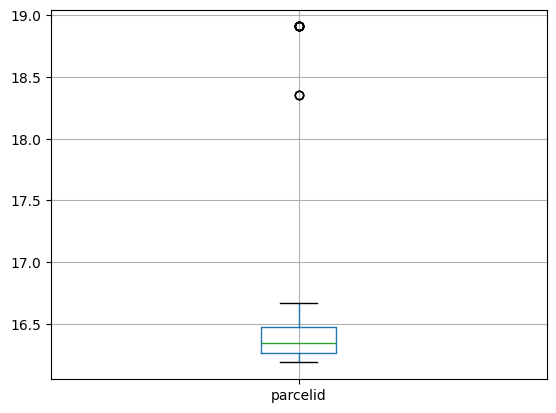

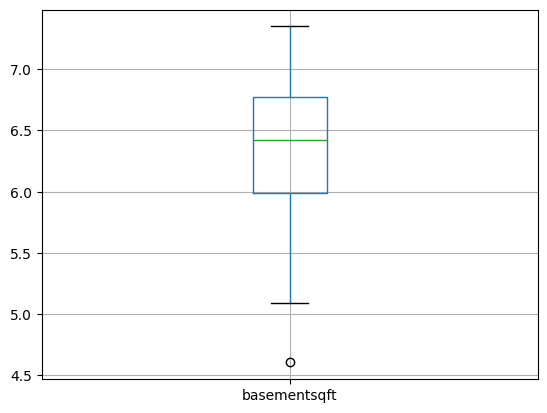

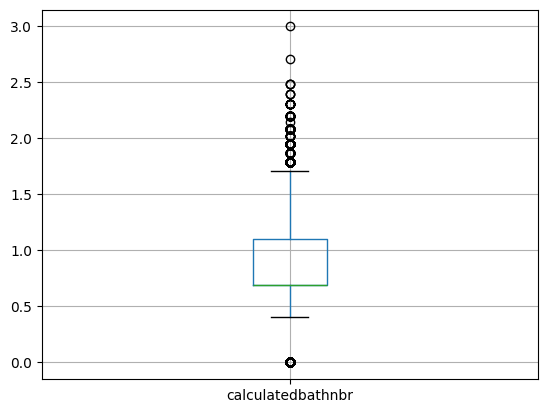

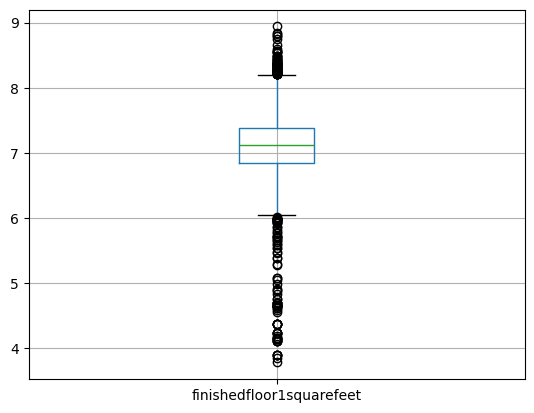

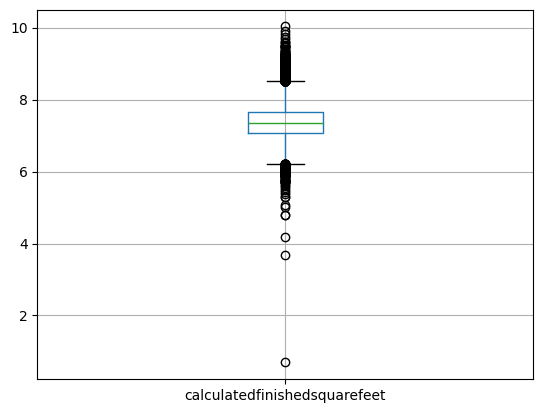

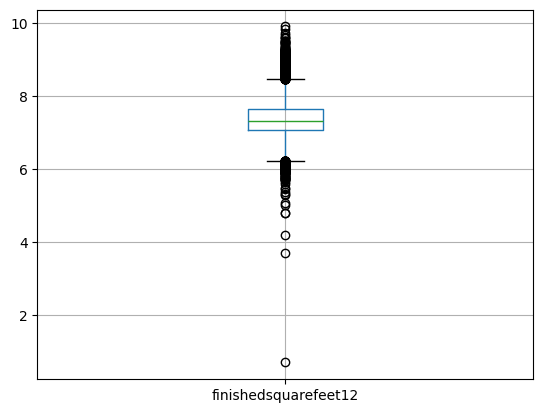

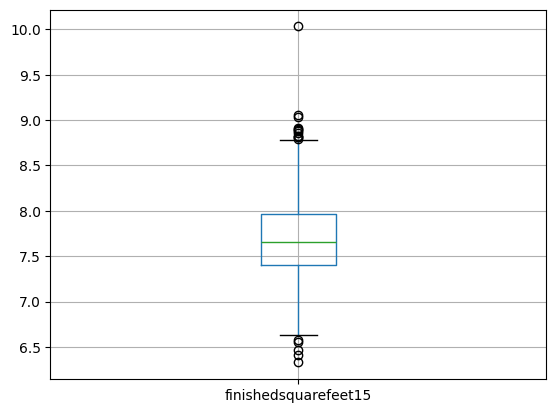

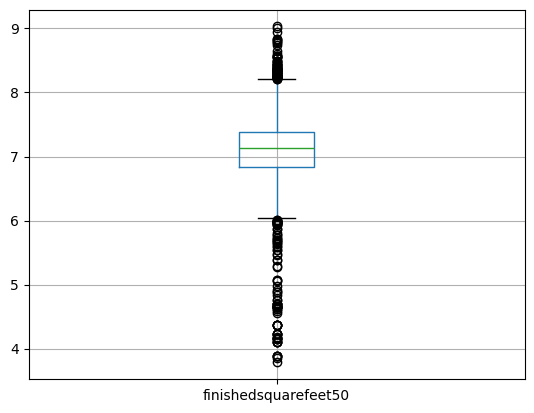

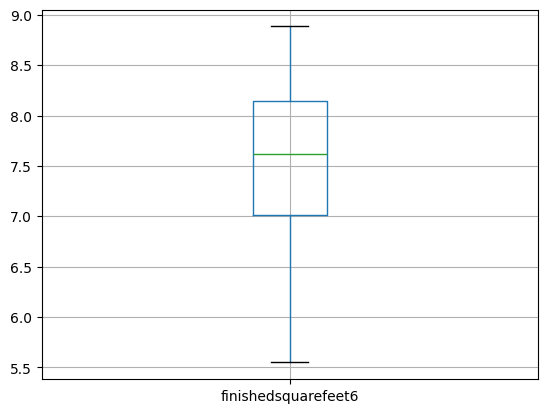

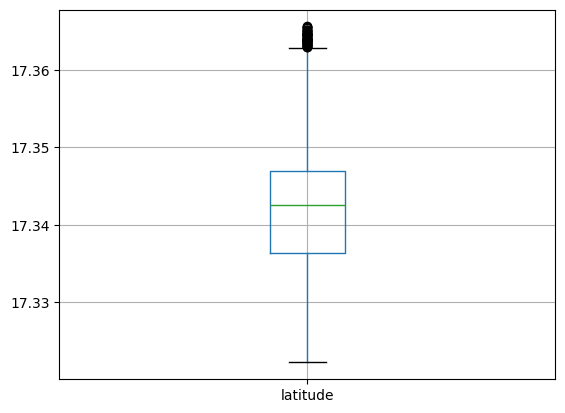

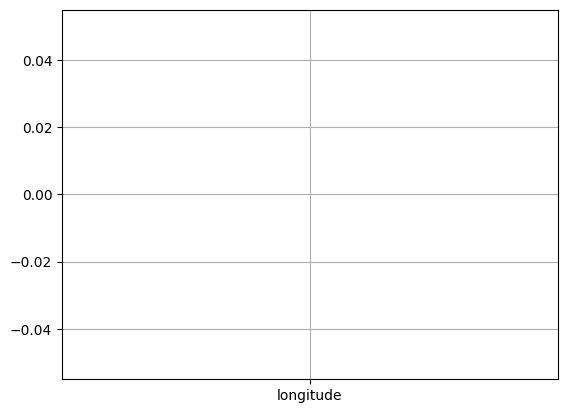

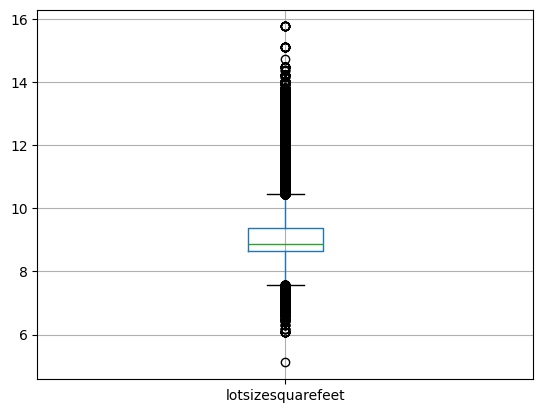

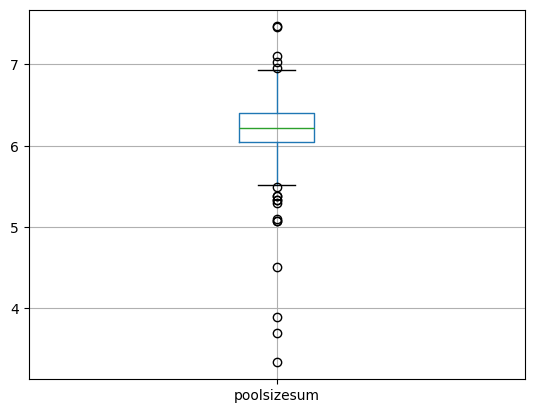

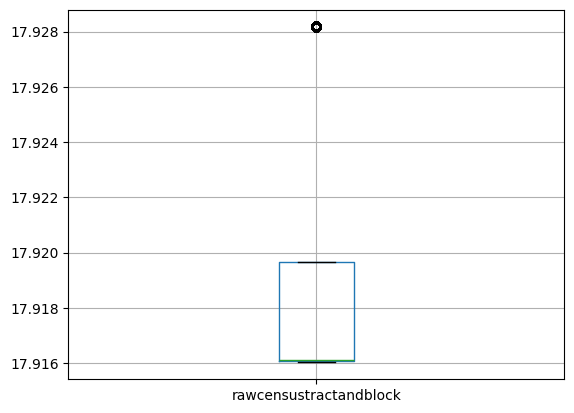

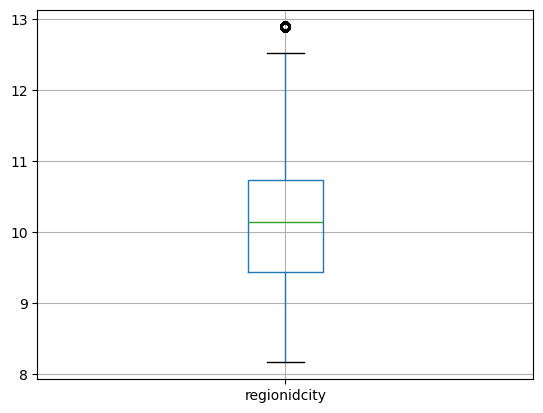

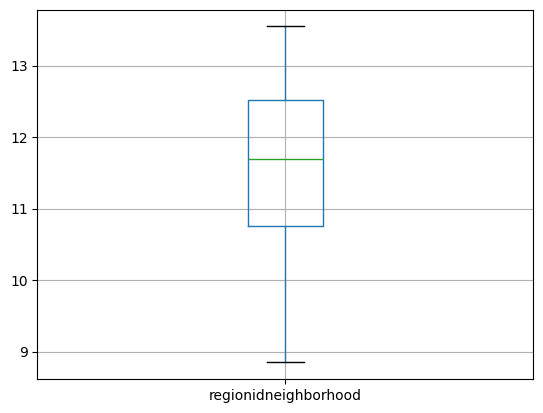

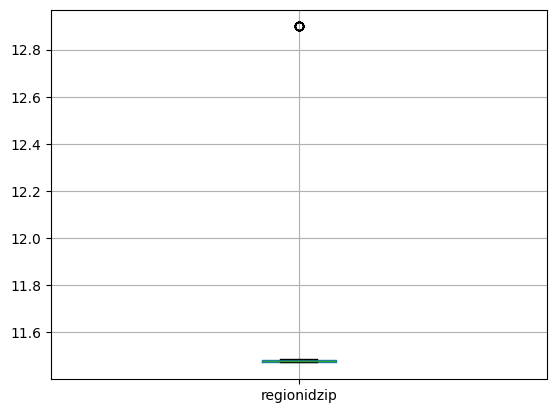

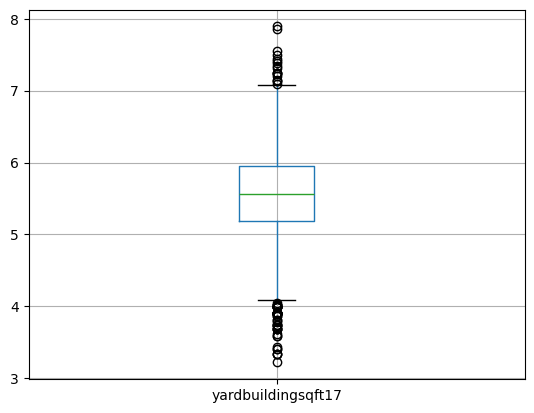

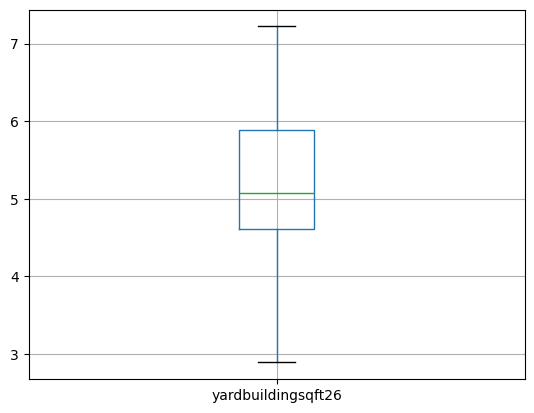

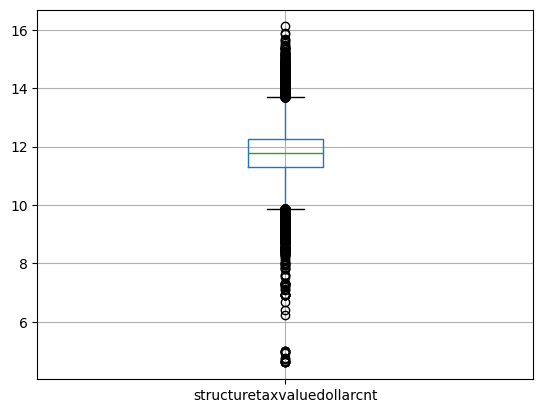

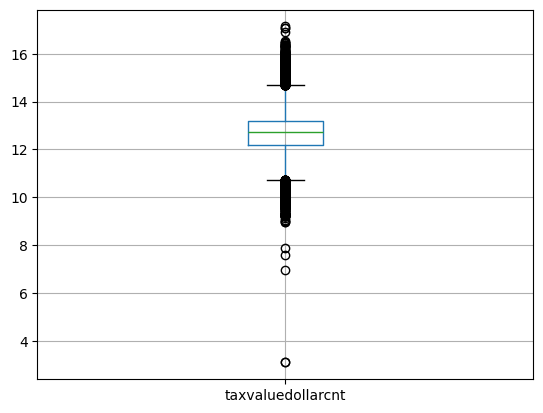

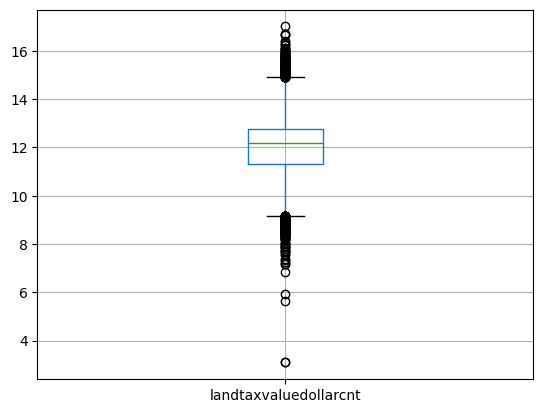

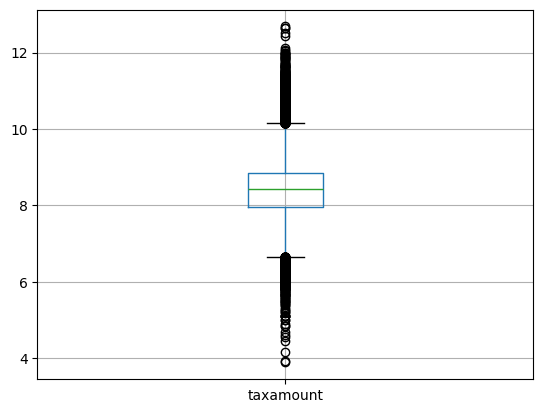

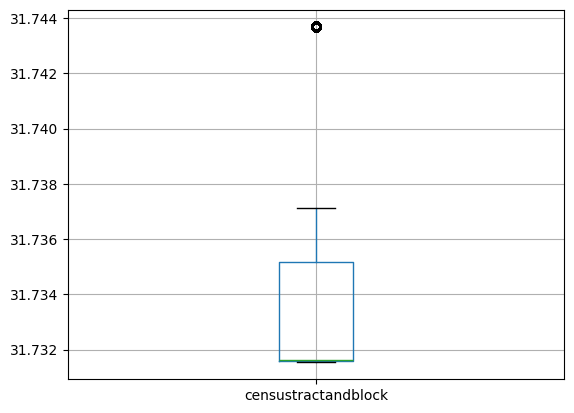

In [55]:
def analyze_outliers(df, var):
    df = df.copy()
    
    if 0 in df[var].unique():
        pass
    else:
        df[var] = np.log(df[var])
        df.boxplot(column=var)
        plt.show()

for var in cont_vars:
    analyze_outliers(zillow_df, var)

In [56]:
# Saving the dataset for Feature Engineering
zillow_df.to_csv('zillow_initial_dataset.csv', index=False)

### **Feature Engineering**

- #### Duplicate check
- #### Missing values
- #### Temporal variables
- #### Selective transformation of incorrectly scaled values
- #### Standardise the values of all variables to the same range (Standardization)
- #### Encoding of Categorical variable
- #### Forming new meaningful features if needed
- #### Dropping redundant columns
- #### Multi-Colinearity check and removal
- #### Outlier check and removal

#### **Importing the necessary Libraries**

In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import math as mt
import matplotlib.pyplot as plt
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore')

#### **Loading the Dataset**

In [62]:
df = pd.read_csv('zillow_initial_dataset.csv')
df_copy = df.copy()
df.shape

(90275, 60)

In [63]:
df.head(10)

parcelid  airconditioningtypeid  architecturalstyletypeid  basementsqft  \
0  17073783                    NaN                       NaN           NaN   
1  17088994                    NaN                       NaN           NaN   
2  17100444                    NaN                       NaN           NaN   
3  17102429                    NaN                       NaN           NaN   
4  17109604                    NaN                       NaN           NaN   
5  17125829                    NaN                       NaN           NaN   
6  17132911                    NaN                       NaN           NaN   
7  17134926                    NaN                       NaN           NaN   
8  17139988                    NaN                       NaN           NaN   
9  17167359                    NaN                       NaN           NaN   

   bathroomcnt  bedroomcnt  buildingclasstypeid  buildingqualitytypeid  \
0          2.5         3.0                  NaN                    NaN   
1          1.0         2.0                  NaN                    NaN   
2          2.0         3.0                  NaN                    NaN   
3          1.5         2.0                  NaN                    NaN   
4          2.5         4.0                  NaN                    NaN   
5          2.5         4.0                  NaN                    NaN   
6          2.0         3.0                  NaN                    NaN   
7          2.5         5.0                  NaN                    NaN   
8          2.0         3.0                  NaN                    NaN   
9          1.0         3.0                  NaN                    NaN   

   calculatedbathnbr  decktypeid  finishedfloor1squarefeet  \
0                2.5         NaN                     548.0   
1                1.0         NaN                     777.0   
2                2.0         NaN                    1101.0   
3                1.5         NaN                    1554.0   
4                2.5         NaN                    1305.0   
5                2.5        66.0                    1303.0   
6                2.0         NaN                    1772.0   
7                2.5         NaN                    1240.0   
8                2.0         NaN                    1292.0   
9                1.0         NaN                     804.0   

   calculatedfinishedsquarefeet  finishedsquarefeet12  finishedsquarefeet13  \
0                        1264.0                1264.0                   NaN   
1                         777.0                 777.0                   NaN   
2                        1101.0                1101.0                   NaN   
3                        1554.0                1554.0                   NaN   
4                        2415.0                2415.0                   NaN   
5                        2882.0                2882.0                   NaN   
6                        1772.0                1772.0                   NaN   
7                        2632.0                2632.0                   NaN   
8                        1292.0                1292.0                   NaN   
9                        1385.0                1385.0                   NaN   

   finishedsquarefeet15  finishedsquarefeet50  finishedsquarefeet6    fips  \
0                   NaN                 548.0                  NaN  6111.0   
1                   NaN                 777.0                  NaN  6111.0   
2                   NaN                1101.0                  NaN  6111.0   
3                   NaN                1554.0                  NaN  6111.0   
4                   NaN                1305.0                  NaN  6111.0   
5                   NaN                1303.0                  NaN  6111.0   
6                   NaN                1772.0                  NaN  6111.0   
7                   NaN                1240.0                  NaN  6111.0   
8                   NaN                1292.0                  NaN  6111.0

#### **Duplicate Entry Check and Removal**

In [65]:
duplicate = df[df.duplicated('parcelid')]
duplicate.shape

(125, 60)

- #### We observe that there are 125 rows of duplicate data with respect to the same parcelid. Hence, we will go ahead and drop those.

In [67]:
df.drop_duplicates(subset="parcelid", keep='first', inplace=True)
df.shape

(90150, 60)

#### **Missing Values**

In [69]:
mis_val = [var for var in df.columns if df[var].isnull().sum() > 0]
df[mis_val].isnull().sum()

airconditioningtypeid           61402
architecturalstyletypeid        89890
basementsqft                    90107
buildingclasstypeid             90134
buildingqualitytypeid           32866
calculatedbathnbr                1176
decktypeid                      89492
finishedfloor1squarefeet        83300
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
finishedsquarefeet13            90117
finishedsquarefeet15            86595
finishedsquarefeet50            83300
finishedsquarefeet6             89731
fireplacecnt                    80553
fullbathcnt                      1176
garagecarcnt                    60253
garagetotalsqft                 60253
hashottuborspa                  87787
heatingorsystemtypeid           34145
lotsizesquarefeet               10136
poolcnt                         72274
poolsizesum                     89184
pooltypeid10                    88991
pooltypeid2                     88946
pooltypeid7                     73478
propertycoun

- #### There are plenty of missing values for multiple columns in the dataset.
- #### 90,150 rows account for 100% of the data.
- #### So, in order to avoid generating synthetic data for columns which have more than 60% missing values, we will drop those columns and perform feature engineering on the rest of the data.



#### **Dropping columns having >60% missing values**

In [72]:
df.shape

(90150, 60)

In [73]:
def drop_columns_with_max_missing_values(df):
    mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
    df[mis_var].isnull().sum()

    limit = np.abs((df.shape[0]) * 0.6)
    var_to_be_dropped = [var for var in mis_var if df[var].isnull().sum() > limit]
    
    print('Columns with more than 60% missing values: \n\n', var_to_be_dropped)
    print('\n##### Dropping columns with more than 60% missing values #####\n')
    
    df.drop(columns=var_to_be_dropped, axis=1, inplace=True)
    print('Remaining columns: \n', df.columns)
    
    return df

df = drop_columns_with_max_missing_values(df)

Columns with more than 60% missing values: 

 ['airconditioningtypeid', 'architecturalstyletypeid', 'basementsqft', 'buildingclasstypeid', 'decktypeid', 'finishedfloor1squarefeet', 'finishedsquarefeet13', 'finishedsquarefeet15', 'finishedsquarefeet50', 'finishedsquarefeet6', 'fireplacecnt', 'garagecarcnt', 'garagetotalsqft', 'hashottuborspa', 'poolcnt', 'poolsizesum', 'pooltypeid10', 'pooltypeid2', 'pooltypeid7', 'regionidneighborhood', 'storytypeid', 'threequarterbathnbr', 'typeconstructiontypeid', 'yardbuildingsqft17', 'yardbuildingsqft26', 'numberofstories', 'fireplaceflag', 'taxdelinquencyflag', 'taxdelinquencyyear']

##### Dropping columns with more than 60% missing values #####

Remaining columns: 
 Index(['parcelid', 'bathroomcnt', 'bedroomcnt', 'buildingqualitytypeid',
       'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'finishedsquarefeet12', 'fips', 'fullbathcnt', 'heatingorsystemtypeid',
       'latitude', 'longitude', 'lotsizesquarefeet',
       'propertycoun

In [74]:
df.shape

(90150, 31)

In [75]:
df.head(10)

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0  17073783          2.5         3.0                    NaN   
1  17088994          1.0         2.0                    NaN   
2  17100444          2.0         3.0                    NaN   
3  17102429          1.5         2.0                    NaN   
4  17109604          2.5         4.0                    NaN   
5  17125829          2.5         4.0                    NaN   
6  17132911          2.0         3.0                    NaN   
7  17134926          2.5         5.0                    NaN   
8  17139988          2.0         3.0                    NaN   
9  17167359          1.0         3.0                    NaN   

   calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  \
0                2.5                        1264.0                1264.0   
1                1.0                         777.0                 777.0   
2                2.0                        1101.0                1101.0   
3                1.5                        1554.0                1554.0   
4                2.5                        2415.0                2415.0   
5                2.5                        2882.0                2882.0   
6                2.0                        1772.0                1772.0   
7                2.5                        2632.0                2632.0   
8                2.0                        1292.0                1292.0   
9                1.0                        1385.0                1385.0   

     fips  fullbathcnt  heatingorsystemtypeid    latitude    longitude  \
0  6111.0          2.0                    NaN  34303597.0 -119287236.0   
1  6111.0          1.0                    NaN  34272866.0 -119198911.0   
2  6111.0          2.0                    NaN  34340801.0 -119079610.0   
3  6111.0          1.0                    NaN  34354313.0 -119076405.0   
4  6111.0          2.0                    NaN  34266578.0 -119165392.0   
5  6111.0          2.0                    NaN  34240014.0 -119024793.0   
6  6111.0          2.0                    NaN  34226842.0 -119059815.0   
7  6111.0          2.0                    NaN  34229816.0 -119050224.0   
8  6111.0          2.0                    NaN  34226351.0 -118983853.0   
9  6111.0          1.0                    NaN  34179289.0 -119169287.0   

   lotsizesquarefeet propertycountylandusecode  propertylandusetypeid  \
0             1735.0                      1128                  265.0   
1                NaN                      1129                  266.0   
2             6569.0                      1111                  261.0   
3             7400.0                      1110                  261.0   
4             6326.0                      1111                  261.0   
5            10000.0                      1111                  261.0   
6             8059.0                      1111                  261.0   
7             7602.0                      1111                  261.0   
8             7405.0                      1111                  261.0   
9             6000.0                      1111                  261.0   

  propertyzoningdesc  rawcensustractandblock  regionidcity  regionidcounty  \
0                NaN            6.111002e+07       34543.0          2061.0   
1                NaN            6.111002e+07       34543.0          2061.0   
2                NaN            6.111001e+07       26965.0          2061.0   
3                NaN            6.111001e+07       26965.0          2061.0   
4                NaN            6.111001e+07       34543.0          2061.0   
5                NaN            6.111005e+07       51239.0          2061.0   
6                NaN            6.111006e+07       51239.0          2061.0   
7                NaN            6.111006e+07       51239.0          2061.0   
8                NaN            6.111005e+07       51239.0          2061.0   
9                NaN            6.111004e+07       13150.0          2061.

#### **Capture elapsed time**

In [77]:
df['yeardifference'] = df['assessmentyear'] - df['yearbuilt']
df.head()

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0  17073783          2.5         3.0                    NaN   
1  17088994          1.0         2.0                    NaN   
2  17100444          2.0         3.0                    NaN   
3  17102429          1.5         2.0                    NaN   
4  17109604          2.5         4.0                    NaN   

   calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  \
0                2.5                        1264.0                1264.0   
1                1.0                         777.0                 777.0   
2                2.0                        1101.0                1101.0   
3                1.5                        1554.0                1554.0   
4                2.5                        2415.0                2415.0   

     fips  fullbathcnt  heatingorsystemtypeid    latitude    longitude  \
0  6111.0          2.0                    NaN  34303597.0 -119287236.0   
1  6111.0          1.0                    NaN  34272866.0 -119198911.0   
2  6111.0          2.0                    NaN  34340801.0 -119079610.0   
3  6111.0          1.0                    NaN  34354313.0 -119076405.0   
4  6111.0          2.0                    NaN  34266578.0 -119165392.0   

   lotsizesquarefeet propertycountylandusecode  propertylandusetypeid  \
0             1735.0                      1128                  265.0   
1                NaN                      1129                  266.0   
2             6569.0                      1111                  261.0   
3             7400.0                      1110                  261.0   
4             6326.0                      1111                  261.0   

  propertyzoningdesc  rawcensustractandblock  regionidcity  regionidcounty  \
0                NaN            6.111002e+07       34543.0          2061.0   
1                NaN            6.111002e+07       34543.0          2061.0   
2                NaN            6.111001e+07       26965.0          2061.0   
3                NaN            6.111001e+07       26965.0          2061.0   
4                NaN            6.111001e+07       34543.0          2061.0   

   regionidzip  roomcnt  unitcnt  yearbuilt  structuretaxvaluedollarcnt  \
0      97081.0      5.0      NaN     1986.0                    115087.0   
1      97083.0      4.0      NaN     1990.0                    143809.0   
2      97113.0      5.0      NaN     1956.0                     33619.0   
3      97113.0      5.0      NaN     1965.0                     45609.0   
4      97084.0      8.0      NaN     1984.0                    277000.0   

   taxvaluedollarcnt  assessmentyear  landtaxvaluedollarcnt  taxamount  \
0           191811.0          2015.0                76724.0    2015.06   
1           239679.0          2015.0                95870.0    2581.30   
2            47853.0          2015.0                14234.0     591.64   
3            62914.0          2015.0                17305.0     682.78   
4           554000.0          2015.0               277000.0    5886.92   

   censustractandblock  logerror transactiondate  yeardifference  
0         6.111002e+13    0.0953      2016-01-27            29.0  
1         6.111002e+13    0.0198      2016-03-30            25.0  
2         6.111001e+13    0.0060      2016-05-27            59.0  
3         6.111001e+13   -0.0566      2016-06-07            50.0  
4         6.111001e+13    0.0573      2016-08-08            31.0

In [78]:
df.drop(columns=['assessmentyear', 'yearbuilt', 'transactiondate'], axis=1, inplace=True)

#### **Transform incorrectly scaled variables**

- #### As mentioned in the data dictionary, the latitude and longitude has been multiplied to 10^6.
- #### We will perform a division of the same to scale it to original and will perform a similar operation for rawcensustractandblock.
- #### Also, we will perform a division of 10^12 for the censustractandblock variable to bring it to original scale.

In [81]:
df[['latitude', 'longitude']] = (df[['latitude', 'longitude']]) / (10**6)
df['censustractandblock'] = (df['censustractandblock']) / (10**12)
df['rawcensustractandblock'] = (df['rawcensustractandblock']) / (10**6)
df.head(10)

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0  17073783          2.5         3.0                    NaN   
1  17088994          1.0         2.0                    NaN   
2  17100444          2.0         3.0                    NaN   
3  17102429          1.5         2.0                    NaN   
4  17109604          2.5         4.0                    NaN   
5  17125829          2.5         4.0                    NaN   
6  17132911          2.0         3.0                    NaN   
7  17134926          2.5         5.0                    NaN   
8  17139988          2.0         3.0                    NaN   
9  17167359          1.0         3.0                    NaN   

   calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  \
0                2.5                        1264.0                1264.0   
1                1.0                         777.0                 777.0   
2                2.0                        1101.0                1101.0   
3                1.5                        1554.0                1554.0   
4                2.5                        2415.0                2415.0   
5                2.5                        2882.0                2882.0   
6                2.0                        1772.0                1772.0   
7                2.5                        2632.0                2632.0   
8                2.0                        1292.0                1292.0   
9                1.0                        1385.0                1385.0   

     fips  fullbathcnt  heatingorsystemtypeid   latitude   longitude  \
0  6111.0          2.0                    NaN  34.303597 -119.287236   
1  6111.0          1.0                    NaN  34.272866 -119.198911   
2  6111.0          2.0                    NaN  34.340801 -119.079610   
3  6111.0          1.0                    NaN  34.354313 -119.076405   
4  6111.0          2.0                    NaN  34.266578 -119.165392   
5  6111.0          2.0                    NaN  34.240014 -119.024793   
6  6111.0          2.0                    NaN  34.226842 -119.059815   
7  6111.0          2.0                    NaN  34.229816 -119.050224   
8  6111.0          2.0                    NaN  34.226351 -118.983853   
9  6111.0          1.0                    NaN  34.179289 -119.169287   

   lotsizesquarefeet propertycountylandusecode  propertylandusetypeid  \
0             1735.0                      1128                  265.0   
1                NaN                      1129                  266.0   
2             6569.0                      1111                  261.0   
3             7400.0                      1110                  261.0   
4             6326.0                      1111                  261.0   
5            10000.0                      1111                  261.0   
6             8059.0                      1111                  261.0   
7             7602.0                      1111                  261.0   
8             7405.0                      1111                  261.0   
9             6000.0                      1111                  261.0   

  propertyzoningdesc  rawcensustractandblock  regionidcity  regionidcounty  \
0                NaN               61.110022       34543.0          2061.0   
1                NaN               61.110015       34543.0          2061.0   
2                NaN               61.110007       26965.0          2061.0   
3                NaN               61.110008       26965.0          2061.0   
4                NaN               61.110014       34543.0          2061.0   
5                NaN               61.110052       51239.0          2061.0   
6                NaN               61.110055       51239.0          2061.0   
7                NaN               61.110055       51239.0          2061.0   
8                NaN               61.110053       51239.0          2061.0   
9                NaN               61.110039       13150.0          2061.0   

   regionidzip  

In [82]:
df.shape

(90150, 29)

#### **Handling Missing Values**

- #### Replace the missing values in the original variable with the mode

In [85]:
df.isnull().sum()

parcelid                            0
bathroomcnt                         0
bedroomcnt                          0
buildingqualitytypeid           32866
calculatedbathnbr                1176
calculatedfinishedsquarefeet      658
finishedsquarefeet12             4665
fips                                0
fullbathcnt                      1176
heatingorsystemtypeid           34145
latitude                            0
longitude                           0
lotsizesquarefeet               10136
propertycountylandusecode           1
propertylandusetypeid               0
propertyzoningdesc              31918
rawcensustractandblock              0
regionidcity                     1801
regionidcounty                      0
regionidzip                        35
roomcnt                             0
unitcnt                         31879
structuretaxvaluedollarcnt        378
taxvaluedollarcnt                   1
landtaxvaluedollarcnt               1
taxamount                           6
censustracta

In [86]:
def replace_missing_data(df, mis_vars):
    print('##### Replacing missing values with mode of features #####')
    for var in mis_vars:
        df[var] = df[var].fillna(df[var].mode()[0])
    return df

mis_var = [var for var in df.columns if df[var].isnull().sum() > 0]
df = replace_missing_data(df, mis_var)

##### Replacing missing values with mode of features #####


In [87]:
df.isnull().sum()

parcelid                        0
bathroomcnt                     0
bedroomcnt                      0
buildingqualitytypeid           0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
heatingorsystemtypeid           0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
propertylandusetypeid           0
propertyzoningdesc              0
rawcensustractandblock          0
regionidcity                    0
regionidcounty                  0
regionidzip                     0
roomcnt                         0
unitcnt                         0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
yeardifference                  0
dtype: int64

#### **Encoding Categorical Variables**

In [89]:
cat_vars = [var for var in df.columns if df[var].dtypes == 'O']
cat_vars

['propertycountylandusecode', 'propertyzoningdesc']

In [90]:
def encode_categorical_variables(df, cat_vars):
    print("##### Performing Label Encoding on Categorical Variables #####")
    print("Categorical variables: ", cat_vars)
    
    for i in range(len(cat_vars)):
        var = cat_vars[i]
        var_le = LabelEncoder()
        var_labels = var_le.fit_transform(df[var])
        var_mappings = {index: label for index, label in enumerate(var_le.classes_)}
        df[(var + '_labels')] = var_labels
        df.drop(columns=var, axis=1, inplace=True)
        
    return df

df = encode_categorical_variables(df, cat_vars)

##### Performing Label Encoding on Categorical Variables #####
Categorical variables:  ['propertycountylandusecode', 'propertyzoningdesc']


In [91]:
df.head(10)

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0  17073783          2.5         3.0                    7.0   
1  17088994          1.0         2.0                    7.0   
2  17100444          2.0         3.0                    7.0   
3  17102429          1.5         2.0                    7.0   
4  17109604          2.5         4.0                    7.0   
5  17125829          2.5         4.0                    7.0   
6  17132911          2.0         3.0                    7.0   
7  17134926          2.5         5.0                    7.0   
8  17139988          2.0         3.0                    7.0   
9  17167359          1.0         3.0                    7.0   

   calculatedbathnbr  calculatedfinishedsquarefeet  finishedsquarefeet12  \
0                2.5                        1264.0                1264.0   
1                1.0                         777.0                 777.0   
2                2.0                        1101.0                1101.0   
3                1.5                        1554.0                1554.0   
4                2.5                        2415.0                2415.0   
5                2.5                        2882.0                2882.0   
6                2.0                        1772.0                1772.0   
7                2.5                        2632.0                2632.0   
8                2.0                        1292.0                1292.0   
9                1.0                        1385.0                1385.0   

     fips  fullbathcnt  heatingorsystemtypeid   latitude   longitude  \
0  6111.0          2.0                    2.0  34.303597 -119.287236   
1  6111.0          1.0                    2.0  34.272866 -119.198911   
2  6111.0          2.0                    2.0  34.340801 -119.079610   
3  6111.0          1.0                    2.0  34.354313 -119.076405   
4  6111.0          2.0                    2.0  34.266578 -119.165392   
5  6111.0          2.0                    2.0  34.240014 -119.024793   
6  6111.0          2.0                    2.0  34.226842 -119.059815   
7  6111.0          2.0                    2.0  34.229816 -119.050224   
8  6111.0          2.0                    2.0  34.226351 -118.983853   
9  6111.0          1.0                    2.0  34.179289 -119.169287   

   lotsizesquarefeet  propertylandusetypeid  rawcensustractandblock  \
0             1735.0                  265.0               61.110022   
1             6000.0                  266.0               61.110015   
2             6569.0                  261.0               61.110007   
3             7400.0                  261.0               61.110008   
4             6326.0                  261.0               61.110014   
5            10000.0                  261.0               61.110052   
6             8059.0                  261.0               61.110055   
7             7602.0                  261.0               61.110055   
8             7405.0                  261.0               61.110053   
9             6000.0                  261.0               61.110039   

   regionidcity  regionidcounty  regionidzip  roomcnt  unitcnt  \
0       34543.0          2061.0      97081.0      5.0      1.0   
1       34543.0          2061.0      97083.0      4.0      1.0   
2       26965.0          2061.0      97113.0      5.0      1.0   
3       26965.0          2061.0      97113.0      5.0      1.0   
4       34543.0          2061.0      97084.0      8.0      1.0   
5       51239.0          2061.0      97089.0      8.0      1.0   
6       51239.0          2061.0      97089.0      6.0      1.0   
7       51239.0          2061.0      97089.0      8.0      1.0   
8       51239.0          2061.0      97091.0      6.0      1.0   
9       13150.0          2061.0      97104.0      6.0      1.0   

   structuretaxvaluedollarcnt  taxvaluedollarcnt  landtaxvaluedollarcnt  \
0                    115087.0           191811.0                76724.0   
1                   

#### **Checking and Removing Outliers**

In [93]:
df.shape

(90150, 29)

In [94]:
z = np.abs(stats.zscore(df))
no_out_df = df[(z < 3).all(axis=1)]
no_out_df.shape

(70260, 29)

#### **Checking for Multi-Colinearity**

In [96]:
no_out_df.corr()

parcelid  bathroomcnt  bedroomcnt  \
parcelid                          1.000000     0.028423    0.014068   
bathroomcnt                       0.028423     1.000000    0.576233   
bedroomcnt                        0.014068     0.576233    1.000000   
buildingqualitytypeid             0.427057    -0.302725   -0.093848   
calculatedbathnbr                 0.032116     0.977620    0.536776   
calculatedfinishedsquarefeet      0.046356     0.723948    0.658793   
finishedsquarefeet12              0.050844     0.717572    0.646947   
fips                              0.875261     0.096319    0.062177   
fullbathcnt                      -0.071773     0.954987    0.528829   
heatingorsystemtypeid            -0.197104    -0.421220   -0.146429   
latitude                         -0.799259     0.025654    0.067254   
longitude                         0.870357     0.033585    0.055389   
lotsizesquarefeet                -0.206629     0.022510   -0.182343   
propertylandusetypeid             0.045825     0.016769   -0.383565   
rawcensustractandblock            0.875924     0.097628    0.064273   
regionidcity                      0.172686    -0.024891   -0.016572   
regionidcounty                   -0.875261    -0.096319   -0.062177   
regionidzip                       0.515522     0.160784    0.154325   
roomcnt                           0.515036     0.040256    0.198038   
unitcnt                          -0.032935     0.071092    0.091626   
structuretaxvaluedollarcnt        0.020601     0.585840    0.306879   
taxvaluedollarcnt                 0.108378     0.409102    0.228897   
landtaxvaluedollarcnt             0.131451     0.239859    0.142587   
taxamount                         0.036577     0.387460    0.230341   
censustractandblock               0.870684     0.099102    0.067906   
logerror                          0.025329     0.045766    0.035055   
yeardifference                   -0.222907    -0.455964   -0.075797   
propertycountylandusecode_labels  0.852989     0.093602    0.006568   
propertyzoningdesc_labels        -0.212511     0.018170    0.042841   

                                  buildingqualitytypeid  calculatedbathnbr  \
parcelid                                       0.427057           0.032116   
bathroomcnt                                   -0.302725           0.977620   
bedroomcnt                                    -0.093848           0.536776   
buildingqualitytypeid                          1.000000          -0.299723   
calculatedbathnbr                             -0.299723           1.000000   
calculatedfinishedsquarefeet                  -0.205977           0.734344   
finishedsquarefeet12                          -0.213388           0.725233   
fips                                           0.421916           0.102517   
fullbathcnt                                   -0.352713           0.978121   
heatingorsystemtypeid                          0.276822          -0.441510   
latitude                                      -0.401890           0.027565   
longitude                                      0.365455           0.037354   
lotsizesquarefeet                             -0.232023           0.019215   
propertylandusetypeid                         -0.205658           0.020252   
rawcensustractandblock                         0.420252           0.103956   
regionidcity                                   0.048790          -0.025117   
regionidcounty                                -0.421916          -0.102517   
regionidzip                                    0.194921           0.171171   
roomcnt                                        0.275909           0.033440   
unitcnt                                        0.049354           0.085811   
structuretaxvaluedollarcnt                    -0.190432           0.602654   
taxvaluedollarcnt                             -0.055208           0.416746   
landtaxvaluedollarcnt                          0.024085           0.245013   
taxamount                      

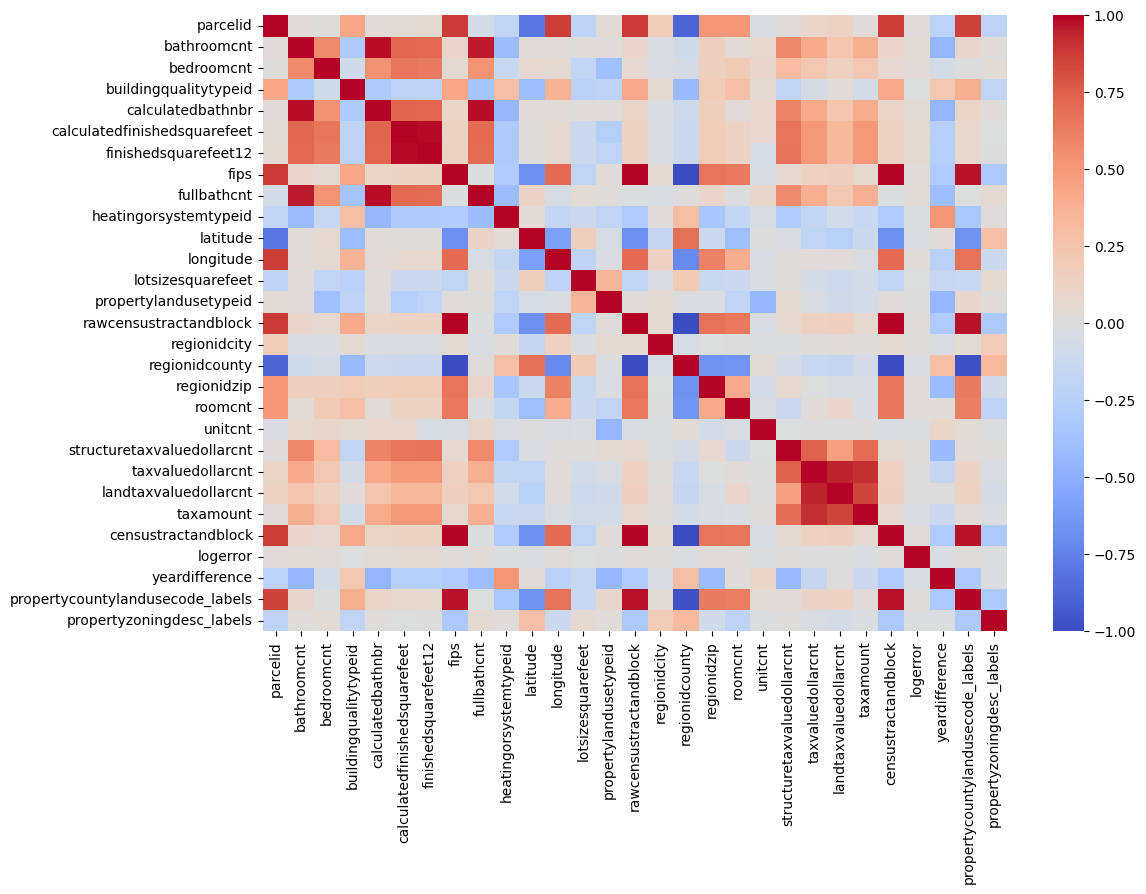

In [97]:
plt.figure(figsize=(12, 8))
sns.heatmap(no_out_df.corr(), cmap='coolwarm')
plt.show()

In [98]:
no_out_df.drop(
    columns=[
        'calculatedbathnbr',
        'calculatedfinishedsquarefeet',
        'structuretaxvaluedollarcnt',
        'taxvaluedollarcnt',
        'landtaxvaluedollarcnt',
        'fullbathcnt'
    ],
    axis=1,
    inplace=True
)

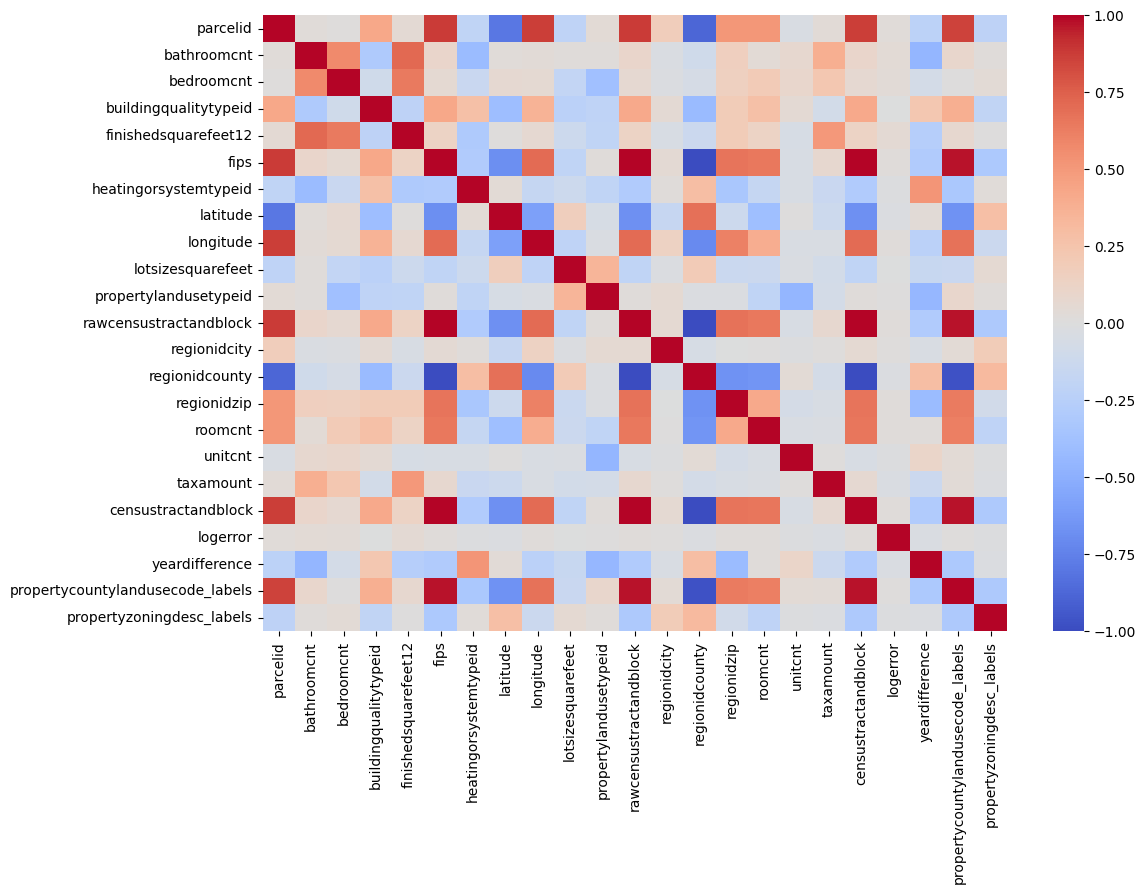

In [99]:
plt.figure(figsize=(12, 8))
sns.heatmap(no_out_df.corr(), cmap='coolwarm')
plt.show()

#### **Re-Examing the Dataset**

In [101]:
no_out_df.shape

(70260, 23)

In [102]:
no_out_df.head(10)

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
26  10726315          3.0         3.0                    4.0   
27  10727091          2.0         3.0                    7.0   
28  10730788          2.0         4.0                    7.0   
29  10735394          3.0         4.0                    4.0   
31  10743512          3.0         2.0                    4.0   
32  10760933          2.0         4.0                    7.0   
33  10772282          3.0         4.0                    4.0   
34  10783331          2.0         3.0                    7.0   
35  10784006          1.0         2.0                    7.0   
36  10799070          2.0         2.0                    4.0   

    finishedsquarefeet12    fips  heatingorsystemtypeid   latitude  \
26                2445.0  6037.0                    2.0  34.184300   
27                1160.0  6037.0                    2.0  34.188121   
28                1570.0  6037.0                    2.0  34.188446   
29                2863.0  6037.0                    2.0  34.171439   
31                1394.0  6037.0                    2.0  34.152890   
32                1212.0  6037.0                    7.0  34.220631   
33                2597.0  6037.0                    2.0  34.209413   
34                1742.0  6037.0                    7.0  34.185891   
35                 950.0  6037.0                    7.0  34.192384   
36                1001.0  6037.0                    2.0  34.178100   

     longitude  lotsizesquarefeet  propertylandusetypeid  \
26 -118.657000            63878.0                  266.0   
27 -118.646361             7688.0                  261.0   
28 -118.616724            11308.0                  261.0   
29 -118.646883            16376.0                  261.0   
31 -118.791494            77543.0                  269.0   
32 -118.521001             7379.0                  261.0   
33 -118.578052            10537.0                  261.0   
34 -118.550426             7076.0                  261.0   
35 -118.549670             6242.0                  261.0   
36 -118.535000            87177.0                  266.0   

    rawcensustractandblock  regionidcity  regionidcounty  regionidzip  \
26               60.371352       12447.0          3101.0      96389.0   
27               60.371352       12447.0          3101.0      96342.0   
28               60.371351       12447.0          3101.0      96342.0   
29               60.371373       12447.0          3101.0      96389.0   
31               60.378003       34278.0          3101.0      96385.0   
32               60.371313       12447.0          3101.0      96355.0   
33               60.371341       12447.0          3101.0      96341.0   
34               60.371331       12447.0          3101.0      96364.0   
35               60.371325       12447.0          3101.0      96364.0   
36               60.371393       12447.0          3101.0      96379.0   

    roomcnt  unitcnt  taxamount  censustractandblock  logerror  \
26      0.0      1.0    7170.22            60.371352    0.0383   
27      0.0      1.0    5421.96            60.371352    0.0030   
28      0.0      1.0    5097.78            60.371351   -0.0020   
29      0.0      1.0    7475.21            60.371373    0.0129   
31      0.0      1.0    5550.36            60.378003    0.0630   
32      0.0      1.0    4560.02            60.371313   -0.1244   
33      0.0      1.0    4998.86            60.371341    0.0545   
34      0.0      1.0    5784.98            60.371331    0.0070   
35      0.0      1.0    3441.90            60.371325    0.0611   
36      0.0      1.0    3833.83            60.371393   -0.0471   

    yeardifference  propertycountylandusecode_labels  \
26            33.0                                 9   
27            55.0                                 2   
28            56.0                                 2   
29            52.0                                 3   
31            17.0                                10   


- #### Due to repetitive data, we will drop 1 of rawcensustractandblock and censustractandblock.
- #### The propertycountylandusecode_labels will serve no useful purpose for our model prediction.
- #### Hence we will drop those.
- #### parcelid field will also serve no use for prediction.
- #### Hence we will drop those, but after doing the train_test_split to keep the labels for predictions.

In [104]:
no_out_df.drop(columns=['censustractandblock', 'propertycountylandusecode_labels'], axis=1, inplace=True)
no_out_df.shape

(70260, 21)

In [105]:
# Saving the Dataset
no_out_df.to_csv('final_zillow_dataset.csv', index=False)

### **Model Creation**

In [107]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import xgboost

from math import sqrt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

%matplotlib inline
pd.set_option('display.max_columns', None)
warnings.simplefilter(action='ignore')

#### **Loading the Dataset**

In [109]:
df = pd.read_csv('final_zillow_dataset.csv')
df.shape

(70260, 21)

In [110]:
df.head(10)

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
0  10726315          3.0         3.0                    4.0   
1  10727091          2.0         3.0                    7.0   
2  10730788          2.0         4.0                    7.0   
3  10735394          3.0         4.0                    4.0   
4  10743512          3.0         2.0                    4.0   
5  10760933          2.0         4.0                    7.0   
6  10772282          3.0         4.0                    4.0   
7  10783331          2.0         3.0                    7.0   
8  10784006          1.0         2.0                    7.0   
9  10799070          2.0         2.0                    4.0   

   finishedsquarefeet12    fips  heatingorsystemtypeid   latitude   longitude  \
0                2445.0  6037.0                    2.0  34.184300 -118.657000   
1                1160.0  6037.0                    2.0  34.188121 -118.646361   
2                1570.0  6037.0                    2.0  34.188446 -118.616724   
3                2863.0  6037.0                    2.0  34.171439 -118.646883   
4                1394.0  6037.0                    2.0  34.152890 -118.791494   
5                1212.0  6037.0                    7.0  34.220631 -118.521001   
6                2597.0  6037.0                    2.0  34.209413 -118.578052   
7                1742.0  6037.0                    7.0  34.185891 -118.550426   
8                 950.0  6037.0                    7.0  34.192384 -118.549670   
9                1001.0  6037.0                    2.0  34.178100 -118.535000   

   lotsizesquarefeet  propertylandusetypeid  rawcensustractandblock  \
0            63878.0                  266.0               60.371352   
1             7688.0                  261.0               60.371352   
2            11308.0                  261.0               60.371351   
3            16376.0                  261.0               60.371373   
4            77543.0                  269.0               60.378003   
5             7379.0                  261.0               60.371313   
6            10537.0                  261.0               60.371341   
7             7076.0                  261.0               60.371331   
8             6242.0                  261.0               60.371325   
9            87177.0                  266.0               60.371393   

   regionidcity  regionidcounty  regionidzip  roomcnt  unitcnt  taxamount  \
0       12447.0          3101.0      96389.0      0.0      1.0    7170.22   
1       12447.0          3101.0      96342.0      0.0      1.0    5421.96   
2       12447.0          3101.0      96342.0      0.0      1.0    5097.78   
3       12447.0          3101.0      96389.0      0.0      1.0    7475.21   
4       34278.0          3101.0      96385.0      0.0      1.0    5550.36   
5       12447.0          3101.0      96355.0      0.0      1.0    4560.02   
6       12447.0          3101.0      96341.0      0.0      1.0    4998.86   
7       12447.0          3101.0      96364.0      0.0      1.0    5784.98   
8       12447.0          3101.0      96364.0      0.0      1.0    3441.90   
9       12447.0          3101.0      96379.0      0.0      1.0    3833.83   

   logerror  yeardifference  propertyzoningdesc_labels  
0    0.0383            33.0                        627  
1    0.0030            55.0                        638  
2   -0.0020            56.0                        638  
3    0.0129            52.0                        632  
4    0.0630            17.0                        769  
5   -0.1244            61.0                        609  
6    0.0545            51.0                        638  
7    0.0070            62.0                        609  
8    0.0611            64.0                        609  
9   -0.0471            36.0                        625

#### **Train-Test Split**

In [112]:
X = df.drop('logerror', axis=1)
y = df['logerror']
new_df = df.copy()
X.shape, y.shape

((70260, 20), (70260,))

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=100)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((52695, 20), (52695,), (17565, 20), (17565,))

#### **Feature Scaling**

In [115]:
train_vars = [var for var in X_train.columns if var not in ['parcelid', 'logerror']]
len(train_vars)

19

In [116]:
scaler = StandardScaler()

scaler.fit(X_train[train_vars])

X_train[train_vars] = scaler.transform(X_train[train_vars])
X_test[train_vars] = scaler.transform(X_test[train_vars])

In [117]:
X_train.head()

parcelid  bathroomcnt  bedroomcnt  buildingqualitytypeid  \
15602  10934030     1.039614    1.077319              -1.450606   
27292  12116223    -1.441419    0.059583               0.629159   
37134  11533593    -0.200903    0.059583               0.629159   
19660  13078527    -0.200903    1.077319               0.629159   
19926  12163237    -0.200903   -0.958153               0.629159   

       finishedsquarefeet12      fips  heatingorsystemtypeid  latitude  \
15602              1.368148 -0.672408              -0.526789  0.533872   
27292              0.535918 -0.672408              -0.526789  0.674431   
37134             -0.728171 -0.672408               1.921281  0.016094   
19660             -0.591716 -0.672408              -0.526789  0.122551   
19926             -0.860129 -0.672408              -0.526789  0.764055   

       longitude  lotsizesquarefeet  propertylandusetypeid  \
15602  -0.840819          -0.282457               -0.50568   
27292  -0.036819          -0.267228               -0.50568   
37134  -1.104821          -0.334003               -0.50568   
19660   0.902323          -0.274704               -0.50568   
19926  -0.126408          -0.311506               -0.50568   

       rawcensustractandblock  regionidcity  regionidcounty  regionidzip  \
15602               -0.703341     -0.813301        0.672408    -1.208086   
27292               -0.671488      0.974128        0.672408    -0.604150   
37134               -0.690187     -0.813301        0.672408    -1.213056   
19660               -0.677385      0.333907        0.672408    -0.032524   
19926               -0.671698      0.103886        0.672408    -0.671254   

        roomcnt   unitcnt  taxamount  yeardifference  \
15602 -0.439343 -0.081247  -0.954568        1.254891   
27292 -0.439343 -0.081247  -0.737606        2.552634   
37134 -0.439343 -0.081247   1.636555        0.779052   
19660 -0.439343 -0.081247  -0.229807        0.173439   
19926 -0.439343 -0.081247  -0.688036        1.903762   

       propertyzoningdesc_labels  
15602                  -0.470974  
27292                   1.686830  
37134                  -0.470974  
19660                   2.541898  
19926                   0.161445

#### **Dropping 'parcelid'**

In [119]:
X_train_new = X_train.copy()
X_test_new = X_test.copy()

X_train.drop(columns='parcelid', axis=1, inplace=True)
X_test.drop(columns='parcelid', axis=1, inplace=True)

### **Linear Regression Model**

In [121]:
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

LinearRegression()

In [122]:
linear_reg_pred = linear_reg.predict(X_test)

print('Mean Absolute Error      : {}'.format(mean_absolute_error(y_test, linear_reg_pred)))
print()
print('Mean Squared Error       : {}'.format(mean_squared_error(y_test, linear_reg_pred)))
print()
print('Root Mean Squared Error  : {}'.format(sqrt(mean_squared_error(y_test, linear_reg_pred))))

Mean Absolute Error      : 0.052713455943530864

Mean Squared Error       : 0.00721919818372578

Root Mean Squared Error  : 0.0849658648147936


#### **Distribution of Target Variable in Train vs Test**

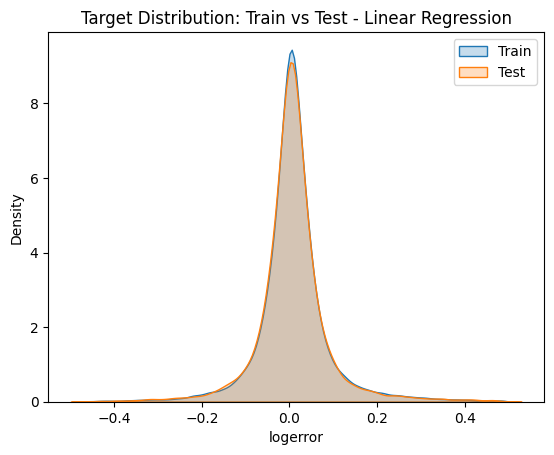

In [124]:
sns.kdeplot(y_train, label='Train', shade=True)
sns.kdeplot(y_test, label='Test', shade=True)
plt.title('Target Distribution: Train vs Test - Linear Regression')
plt.legend()
plt.show()

### **Elastic Net Model**

In [126]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

ElasticNet(alpha=0.1)

In [127]:
elastic_net_pred = elastic_net.predict(X_test)

print('Mean Absolute Error      : {}'.format(mean_absolute_error(y_test, elastic_net_pred)))
print()
print('Mean Squared Error       : {}'.format(mean_squared_error(y_test, elastic_net_pred)))
print()
print('Root Mean Squared Error  : {}'.format(sqrt(mean_squared_error(y_test, elastic_net_pred))))

Mean Absolute Error      : 0.052772037640842616

Mean Squared Error       : 0.007263564946868809

Root Mean Squared Error  : 0.08522655071554175


### **Ridge Regression Model**

In [135]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(X_train, y_train)

Ridge(alpha=1, solver='cholesky')

In [136]:
ridge_reg_pred = ridge_reg.predict(X_test)

print('Mean Absolute Error      : {}'.format(mean_absolute_error(y_test, ridge_reg_pred)))
print()
print('Mean Squared Error       : {}'.format(mean_squared_error(y_test, ridge_reg_pred)))
print()
print('Root Mean Squared Error  : {}'.format(sqrt(mean_squared_error(y_test, ridge_reg_pred))))

Mean Absolute Error      : 0.05271298978108193

Mean Squared Error       : 0.007219087862614832

Root Mean Squared Error  : 0.084965215603886


#### **Coefficient Magnitude Plot**

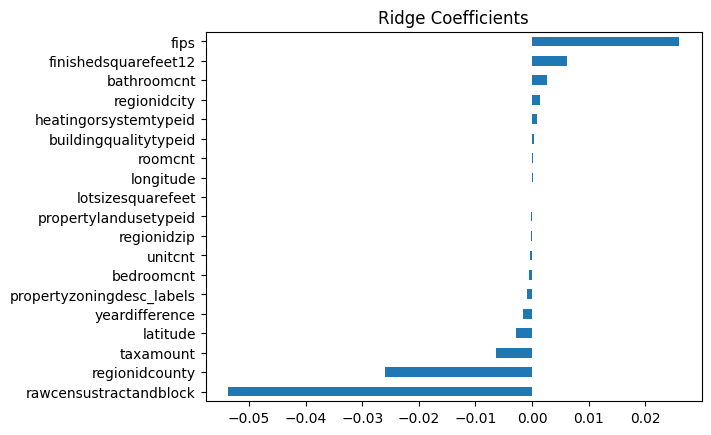

In [139]:
coef = pd.Series(ridge_reg.coef_, index=X_train.columns)
coef.sort_values().plot(kind='barh')
plt.title('Ridge Coefficients')
plt.show()

#### **Cross-Validation Scores**

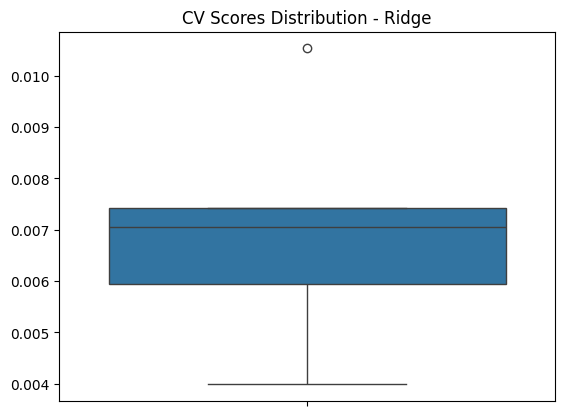

In [141]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(ridge_reg, X_train, y_train, cv=5)
sns.boxplot(cv_scores)
plt.title('CV Scores Distribution - Ridge')
plt.show()

### **Lasso Regression Model**

In [143]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X_train, y_train)

Lasso(alpha=0.1)

In [146]:
lasso_reg_pred = lasso_reg.predict(X_test)

print('Mean Absolute Error      : {}'.format(mean_absolute_error(y_test, lasso_reg_pred)))
print()
print('Mean Squared Error       : {}'.format(mean_squared_error(y_test, lasso_reg_pred)))
print()
print('Root Mean Squared Error  : {}'.format(sqrt(mean_squared_error(y_test, lasso_reg_pred))))

Mean Absolute Error      : 0.052772037640842616

Mean Squared Error       : 0.007263564946868809

Root Mean Squared Error  : 0.08522655071554175


#### **Sparsity of Coefficients**

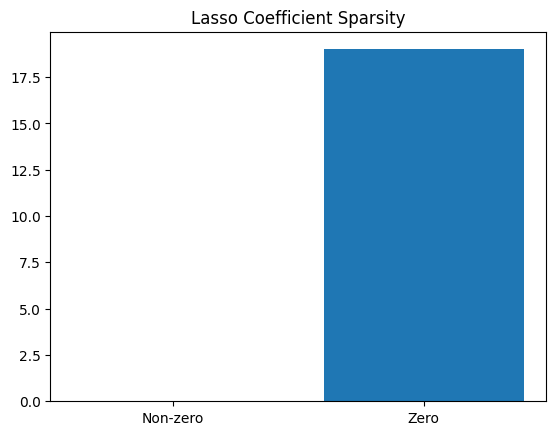

In [153]:
nonzero = np.sum(lasso_reg.coef_ != 0)
zero = len(lasso_reg.coef_) - nonzero
plt.bar(['Non-zero', 'Zero'], [nonzero, zero])
plt.title('Lasso Coefficient Sparsity')
plt.show()

### **XGBoost Regression Model**

In [156]:
xgb_reg = xgboost.XGBRegressor()
xgb_reg.fit(X_train, y_train);

In [157]:
xgb_reg_pred = xgb_reg.predict(X_test)

print('Mean Absolute Error      : {}'.format(mean_absolute_error(y_test, xgb_reg_pred)))
print()
print('Mean Squared Error       : {}'.format(mean_squared_error(y_test, xgb_reg_pred)))
print()
print('Root Mean Squared Error  : {}'.format(sqrt(mean_squared_error(y_test, xgb_reg_pred))))

Mean Absolute Error      : 0.05406276035819799

Mean Squared Error       : 0.0073732010599922

Root Mean Squared Error  : 0.08586734571414328


#### **Training vs Test Target Distribution**

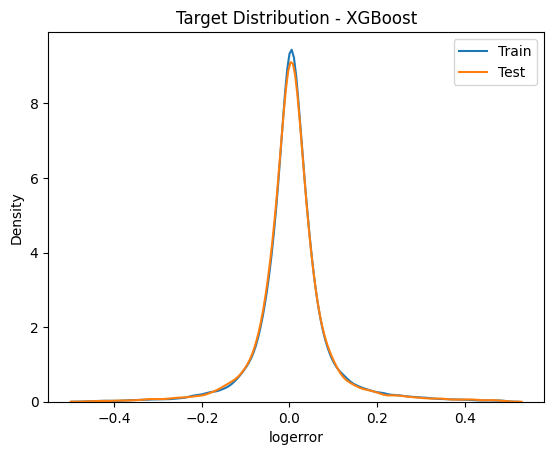

In [159]:
sns.kdeplot(y_train, label='Train')
sns.kdeplot(y_test, label='Test')
plt.title('Target Distribution - XGBoost')
plt.legend()
plt.show()

### **AdaBoost Regression Model**

In [169]:
adaboost_reg = AdaBoostRegressor()
adaboost_reg.fit(X_train, y_train)

AdaBoostRegressor()

In [171]:
adaboost_reg_pred = adaboost_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, adaboost_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, adaboost_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, adaboost_reg_pred))))

Mean Absolute Error : 0.0557980430002197

Mean Squared Error : 0.007446839559073981

Root Mean Squared Error : 0.0862950726233774


#### **Feature Importance**

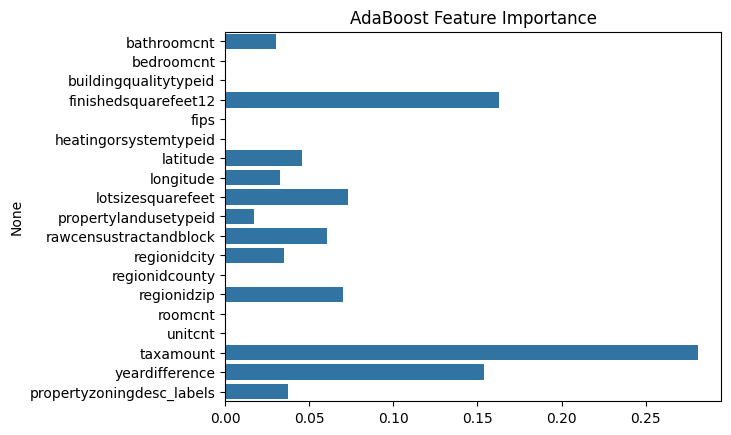

In [177]:
sns.barplot(x=adaboost_reg.feature_importances_, y=X_train.columns)
plt.title('AdaBoost Feature Importance')
plt.show()

### **Gradient Boosting Regressor model**

In [179]:
gb_reg = GradientBoostingRegressor()
gb_reg.fit(X_train, y_train)

GradientBoostingRegressor()

In [180]:
gb_reg_pred = gb_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, gb_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, gb_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, gb_reg_pred))))

Mean Absolute Error : 0.0525604000397615

Mean Squared Error : 0.007177016696944048

Root Mean Squared Error : 0.08471727507978552


#### **Feature Importance**

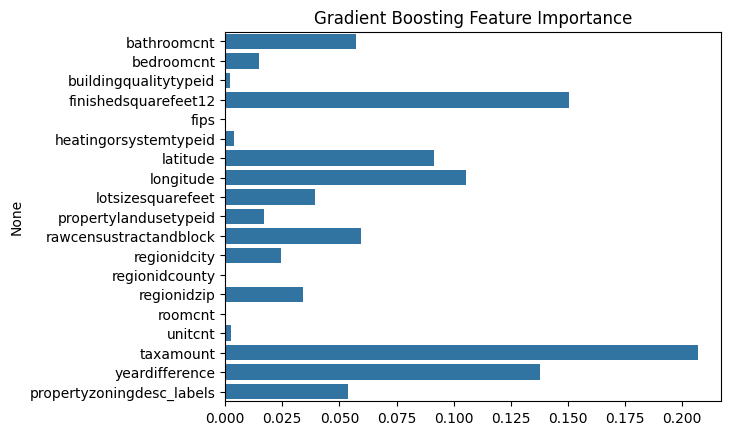

In [182]:
sns.barplot(x=gb_reg.feature_importances_, y=X_train.columns)
plt.title('Gradient Boosting Feature Importance')
plt.show()

### **Decision Tree Regressor model**

In [185]:
tree_reg = DecisionTreeRegressor(max_depth=5)
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [186]:
tree_reg_pred = tree_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, tree_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, tree_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, tree_reg_pred))))

Mean Absolute Error : 0.05291490172561567

Mean Squared Error : 0.007262408010192682

Root Mean Squared Error : 0.0852197630259125


#### **Visualizing Tree Structure (Top 3 Levels)**

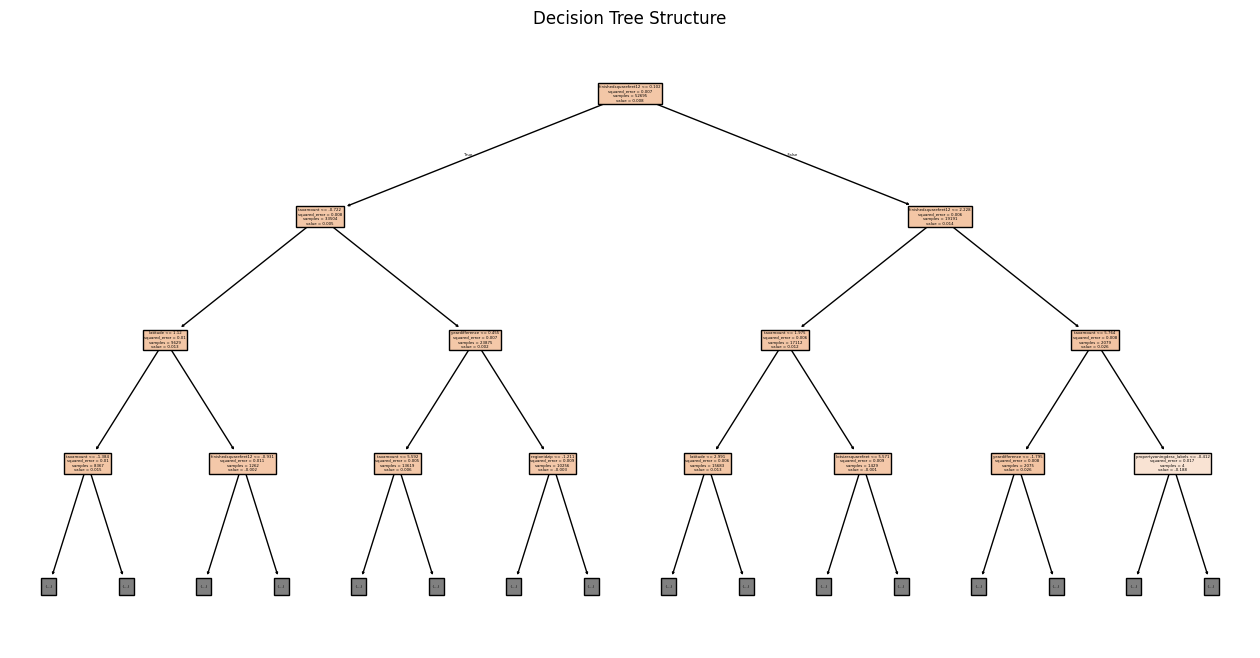

In [189]:
from sklearn.tree import plot_tree
plt.figure(figsize=(16,8))
plot_tree(tree_reg, max_depth=3, feature_names=X_train.columns, filled=True)
plt.title('Decision Tree Structure')
plt.show()

### **Random Forest Regression model**

In [192]:
forest_reg = RandomForestRegressor(n_estimators=500, max_depth=6)
forest_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=6, n_estimators=500)

In [196]:
forest_reg_pred = forest_reg.predict(X_test)

print('Mean Absolute Error : {}'.format(mean_absolute_error(y_test, forest_reg_pred)))
print()
print('Mean Squared Error : {}'.format(mean_squared_error(y_test, forest_reg_pred)))
print()
print('Root Mean Squared Error : {}'.format(sqrt(mean_squared_error(y_test, forest_reg_pred))))

Mean Absolute Error : 0.05248766431036142

Mean Squared Error : 0.0071756165897027815

Root Mean Squared Error : 0.08470901126623295


#### **Feature Importance Plot**

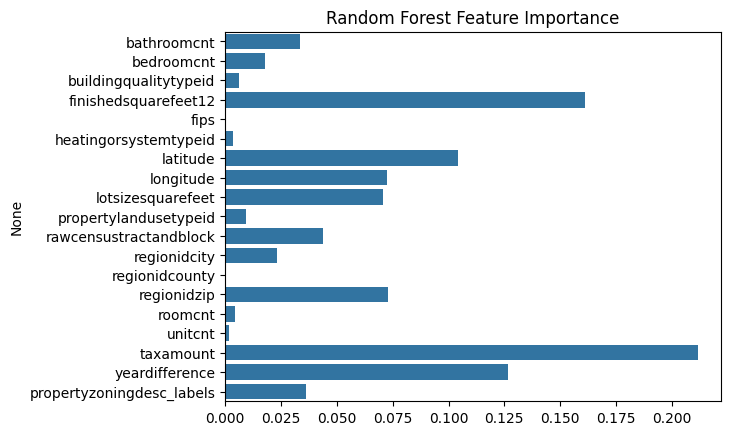

In [225]:
importances = forest_reg.feature_importances_
sns.barplot(x=importances, y=X_train.columns)
plt.title('Random Forest Feature Importance')
plt.show()

### **Cross Validation and Hyperparameter Optimization**

In [263]:
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import numpy as np

# Optimize the hyperparameter grid (reduce combinations)
param_grid = [
    {'n_estimators': [100, 200], 'max_features': [4]},
    {'bootstrap': [False], 'n_estimators': [100], 'max_features': [4]}
]

# Initialize with parallel jobs and fixed random state
forest_regressor = RandomForestRegressor(random_state=42)

# Run GridSearch with fewer combinations and parallelization
grid_search = GridSearchCV(
    estimator=forest_regressor,
    param_grid=param_grid,
    scoring='neg_mean_squared_error',
    return_train_score=True,
    cv=3,
    n_jobs=-1  # Enable parallel processing
)

# Fit grid search
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid=[{'max_features': [4], 'n_estimators': [100, 200]},
                         {'bootstrap': [False], 'max_features': [4],
                          'n_estimators': [100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [265]:
# Cross-validation with parallel jobs
scores = cross_val_score(
    grid_search.best_estimator_, 
    X_train, 
    y_train, 
    scoring="neg_mean_squared_error", 
    cv=5, 
    n_jobs=-1
)

# Convert to RMSE
forest_reg_rmse_scores = np.sqrt(-scores)
print("RMSE scores:", forest_reg_rmse_scores)
print("Mean RMSE:", forest_reg_rmse_scores.mean())

RMSE scores: [0.08696115 0.08605601 0.08389372 0.08413665 0.08532043]
Mean RMSE: 0.08527359053901755


### **Checking Feature Importance**

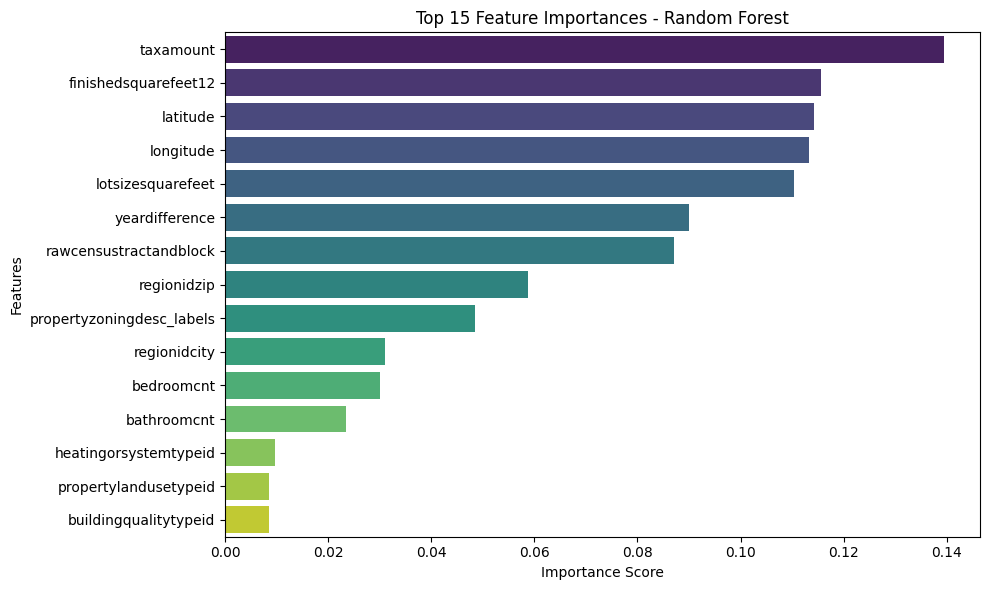

In [267]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the best model from GridSearch
best_rf = grid_search.best_estimator_

# Extract feature importances
importances = best_rf.feature_importances_
features = X_train.columns

# Create a DataFrame for easier plotting
feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot: Top N Important Features
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Feature Importances - Random Forest')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.tight_layout()
plt.show()

#### **Cumulative Feature Importance Plot**

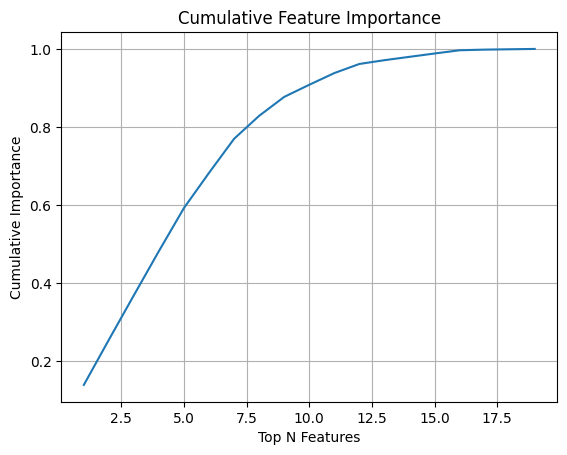

In [269]:
feat_imp_df['Cumulative'] = feat_imp_df['Importance'].cumsum()
sns.lineplot(x=range(1, len(feat_imp_df)+1), y=feat_imp_df['Cumulative'])
plt.title("Cumulative Feature Importance")
plt.xlabel("Top N Features")
plt.ylabel("Cumulative Importance")
plt.grid(True)
plt.show()

In [278]:
# 1. Get best model
best_model = grid_search.best_estimator_

# 2. Predict on test set
y_pred = best_model.predict(X_test)

# 3. Create a results DataFrame
import pandas as pd

results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# 4. Display the top 10 predictions
results_df.head(10)

Actual  Predicted
11056 -0.0356   0.017126
20399 -0.0101   0.007510
51034 -0.0502   0.017368
41560 -0.0222   0.012058
69896  0.0010  -0.036806
13018  0.0159  -0.033708
7249   0.0257  -0.026155
23940 -0.0182   0.015513
43465  0.0000   0.021330
67129  0.0178  -0.000539

In [280]:
# Save the Predicitons
import pandas as pd

# 1. Get best model from GridSearch
best_model = grid_search.best_estimator_

# 2. Make predictions on test data
y_pred = best_model.predict(X_test)

# 3. Create a DataFrame with Actual vs Predicted
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# 4. Save to CSV
results_df.to_csv('zillow_predictions.csv', index=False)

print("Predictions saved to 'zillow_predictions.csv'")

Predictions saved to 'zillow_predictions.csv'
